# **1.  라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# **2. 데이터 준비**

- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 피트를 초과하는 주거용 토지의 비율
- INDUS: 비상업 면적의 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 주택당 평균 방의 개수
- AGE: 1940년 이전에 건축된 자가주택의 비율
- DIS: 5개의 보스턴 고용 센터와의 거리
- RAD: 고속도로 접근성 지수
- TAX: 10,000달러당 재산세율
- PTRATIO: 도시별 교사와 학생 수 비율
- B: 마을의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러) --- target 데이터

### **2-1. 학습용 데이터 준비**

In [2]:
### 데이터 불러오기

train = pd.read_csv('./datasets/train.csv')
train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


In [3]:
### 학습용 데이터 수 확인

len(train)

455

In [4]:
### 데이터 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


- 데이터 세트 feature의 null값은 존재하지 않음
- ID를 제외한 모든 컬럼이 float형임

In [5]:
### 데이터 통계치 확인

train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


- 데이터 간의 스케일 차이가 상당함을 확인할 수 있다.

In [6]:
X = train.drop(columns=['ID', 'MEDV']) # ID 컬럼의 경우 불필요하므로 제거
y = train['MEDV'] 

In [7]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.1,random_state = 0)

# train: 학습에 사용할 훈련용 데이터
# valid: 학습 결과 평가에 사용할 테스트용 데이터

In [8]:
X_train.shape, X_valid.shape

((409, 13), (46, 13))

In [9]:
X_train.head(3) # feature data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
340,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
448,0.34109,0.0,7.38,0.0,0.493,6.415,40.1,4.7211,5.0,287.0,19.6,396.90,6.12


In [10]:
X_valid.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
354,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
60,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
293,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98


In [11]:
y_train.shape, y_valid.shape

((409,), (46,))

In [12]:
y_train.head(3) # target data

141    28.0
340    24.7
448    25.0
Name: MEDV, dtype: float64

In [13]:
y_valid.head(3)

354    37.3
60     18.4
293    26.4
Name: MEDV, dtype: float64

### **2-2. 예측용 데이터 준비**
- 정답(target data)가 없는 데이터

In [14]:
### 데이터 불러오기

test = pd.read_csv("./datasets/test.csv")
test = test.drop(columns = ['ID']) # ID 컬럼의 경우 불필요하므로 제거
test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92
1,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96
2,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73


In [15]:
### 예측용 데이터 수 확인

len(test)

51

In [16]:
### 데이터 정보 확인

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     51 non-null     float64
 1   ZN       51 non-null     float64
 2   INDUS    51 non-null     float64
 3   CHAS     51 non-null     float64
 4   NOX      51 non-null     float64
 5   RM       51 non-null     float64
 6   AGE      51 non-null     float64
 7   DIS      51 non-null     float64
 8   RAD      51 non-null     float64
 9   TAX      51 non-null     float64
 10  PTRATIO  51 non-null     float64
 11  B        51 non-null     float64
 12  LSTAT    51 non-null     float64
dtypes: float64(13)
memory usage: 5.3 KB


- 결측치는 존재하지 않음을 확인할 수 있다.

# **3. 데이터 전처리**

## **3-1. 피쳐(feature) 데이터 변환**

### **MinMaxScaler**
- 최솟값이 0이고 최댓값이 1인 값으로 정규화

In [17]:
from sklearn.preprocessing import MinMaxScaler

### StandardScaler 객체 생성
scaler = MinMaxScaler()

### 학습 데이터에 대해서만 fit(), transform() 수행
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

### 테스트 데이터 스케일링
# 학습할 때와 동일한 기반 설정으로 동일하게 테스트 데이터를 변환해야 함
# 테스트 데이터에서는 transform만 수행
scaled_X_valid = scaler.transform(X_valid)

### 예측용 데이터 스케일링
scaled_test = scaler.transform(test)

In [18]:
### 학습용 데이터

pd.DataFrame(scaled_X_train,columns = X_train.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000391,0.25,0.161290,0.0,0.076763,0.606630,0.315139,0.445802,0.130435,0.177820,0.680851,1.000000,0.100993
1,0.001720,0.00,0.236437,0.0,0.122407,0.507760,0.037075,0.479224,0.086957,0.086042,0.563830,0.993813,0.161986
2,0.003763,0.00,0.253666,0.0,0.215768,0.546848,0.383110,0.374868,0.173913,0.189293,0.744681,1.000000,0.124539


In [19]:
### 평가용 데이터

pd.DataFrame(scaled_X_valid,columns = X_valid.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000815,0.8,0.164589,0.0,0.045643,0.687296,0.255407,0.416160,0.130435,0.108987,0.702128,1.000000,0.051915
1,0.008617,0.0,0.281525,0.0,0.309129,0.562177,0.942327,0.347062,0.130435,0.227533,0.893617,0.977281,0.314043
2,0.000863,0.0,0.073314,0.0,0.205394,0.391454,0.894954,0.193963,0.086957,0.009560,0.553191,0.985040,0.347518


In [20]:
### 예측용 데이터

pd.DataFrame(scaled_test,columns = test.columns).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.001173,0.0,0.492302,1.0,0.334025,0.457942,0.936148,0.183671,0.173913,0.168260,0.404255,1.000000,0.459291
1,0.073423,0.0,0.646628,1.0,0.502075,0.662004,0.974253,0.007599,1.000000,0.913958,0.808511,0.987702,0.034894
2,0.061086,0.0,0.646628,0.0,0.672199,0.592834,0.981462,0.127924,1.000000,0.913958,0.808511,0.894493,0.453901


- 정규화가 제대로 진행된 것을 확인할 수 있다.

## **3-2. 타겟(target) 데이터 변환**

In [21]:
scaled_y_train = np.log1p(y_train)

In [22]:
scaled_y_train.head(3)

141    3.367296
340    3.246491
448    3.258097
Name: MEDV, dtype: float64

# **4. 평가 지표 만들기**

### **4-1. MSE(Mean Squared Error)**
- 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값
- ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### **4-2. MAE(Mean Absolute Error)**
- 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값
- $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

### **4-3. RMSE(Root Mean Squared Error)**
- 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 후 루트를 씌운 값
- $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [23]:
### 모델별 성능 확인을 위한 함수

my_predictions = {} # 예측값을 저장할 빈 딕셔너리

### 예측 결과 시각화
def plot_predictions(name_,pred,actual): # model, 예측값, 실제값
    df = pd.DataFrame({'prediction' : pred,'actual' : y_valid})
    df = df.sort_values(by = 'actual').reset_index(drop = True) # 실제값 기준 오름차순 정렬
    
    plt.figure(figsize = (12,9))
    plt.scatter(df.index,df['prediction'],marker = 'x',color = 'r')
    plt.scatter(df.index,df['actual'],alpha = 0.7,marker = 'o',color = 'black')
    plt.title(name_,fontsize = 15)
    plt.legend(['prediction','actual'],fontsize = 12)
    plt.show()

### rmse(mean squared error) 계산    
def rmse_eval(name_,pred,actual):
    global my_predictions # 예측값
    global colors # 색상값
    
    ### 예측 결과 시각화
    plot_predictions(name_,pred,actual) 
    print()
    
    ### 모델별 rmse 계산
    rmse = np.sqrt(mean_squared_error(pred,actual)) # rmse 계산
    my_predictions[name_] = rmse
    y_value = sorted(my_predictions.items(),key = lambda x: x[1]) # 오름차순 정렬
    df = pd.DataFrame(y_value, columns = ['model','rmse'])
    print(df)

# **5. 모델링**

### **5-0. Model Hyperparameter Setting**
- 대부분의 모델들은 사람이 직접 설정할 수 있는 **hyper parameter**를 가지고 있음
- hyper parameter에 어떤 값이 설정되는가에 따라 모델의 성능은 크게 차이나게 된다.

### **5-1. LinearRegression**
- 선형 회귀
- 실제값과 예측값의 RSS(Residual Sum of Squares)를 최소화 해 OLS(Ordinary Least Squares) 추정 방식으로 구현
- 규제를 적용하지 **않은** 모델

In [24]:
### 모델 객체 생성

lr_model = LinearRegression(n_jobs = -1) # CPU Core를 있는 대로 모두 사용하겠다~

In [25]:
### 모델 학습

lr_model.fit(scaled_X_train,scaled_y_train) 

LinearRegression(n_jobs=-1)

In [26]:
### 예측

lr_pred_val = np.expm1(lr_model.predict(scaled_X_valid))

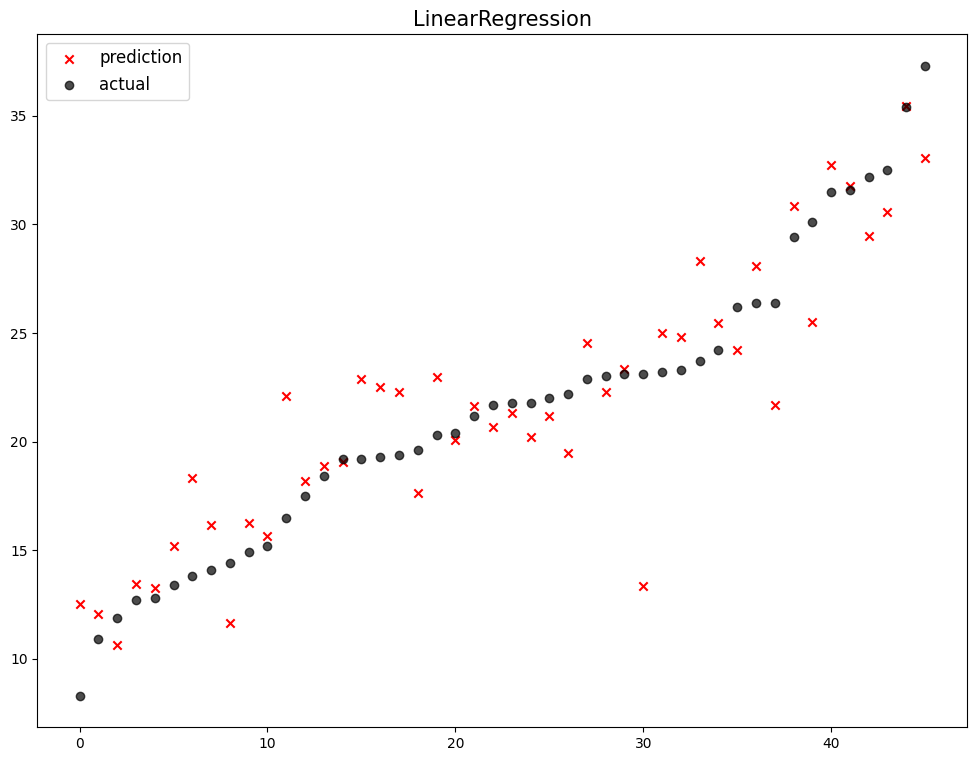


              model      rmse
0  LinearRegression  2.782956


In [27]:
### 평가

rmse_eval('LinearRegression',lr_pred_val,y_valid) # model, 예측값, 실제값

### **5-2. 라쏘(Lasso)**

In [28]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

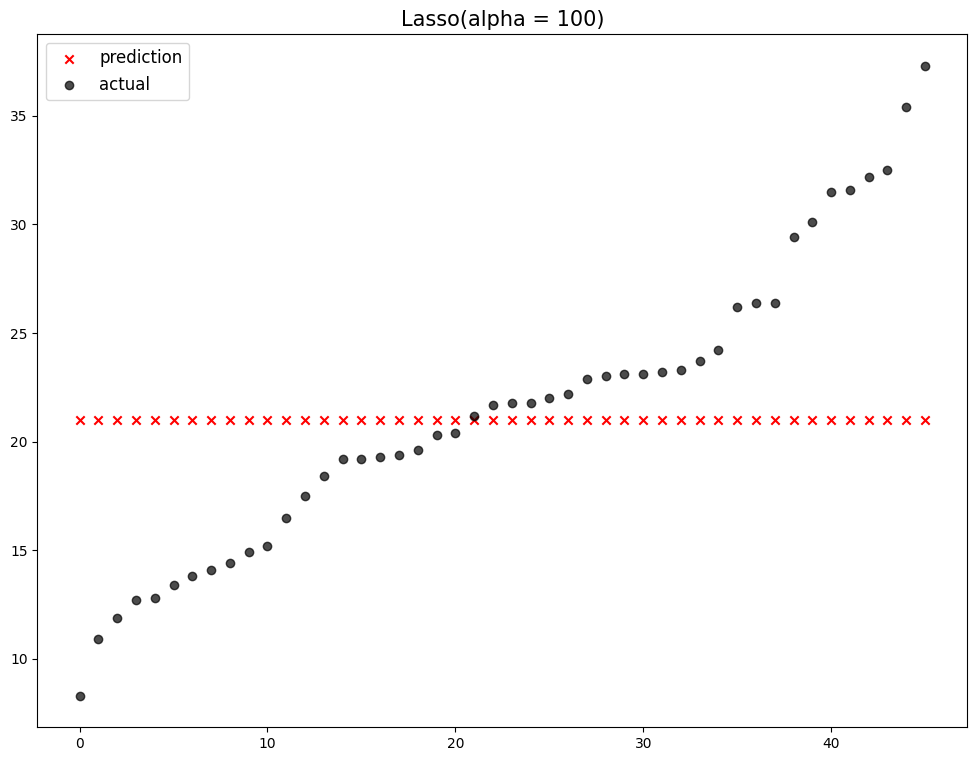


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 100)  6.673060


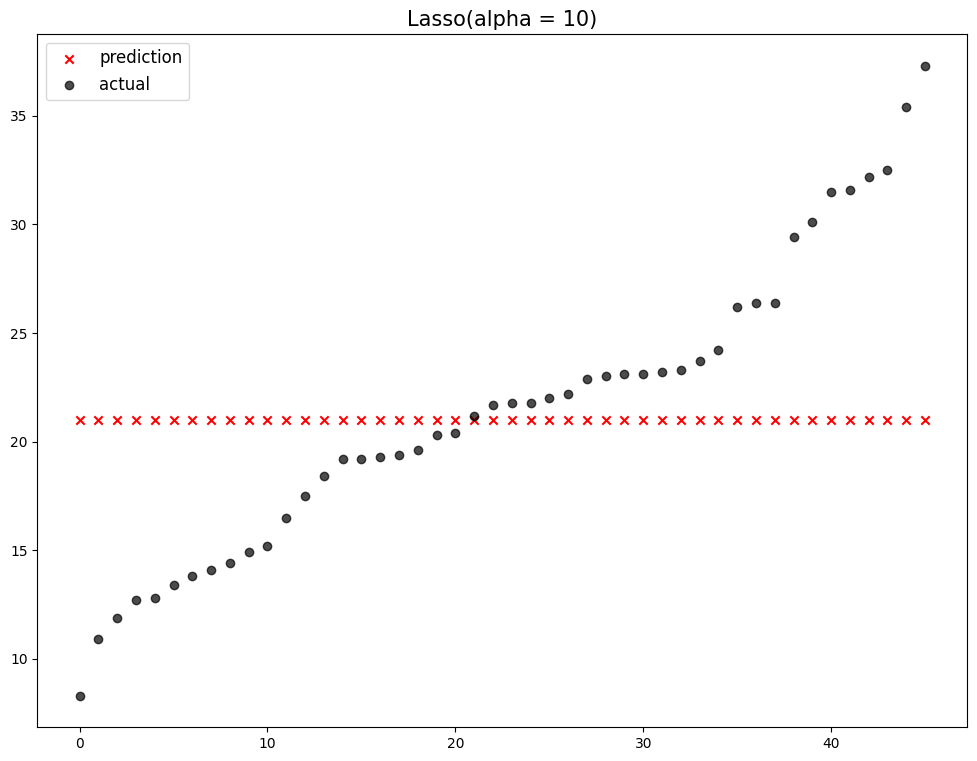


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 100)  6.673060
2   Lasso(alpha = 10)  6.673060


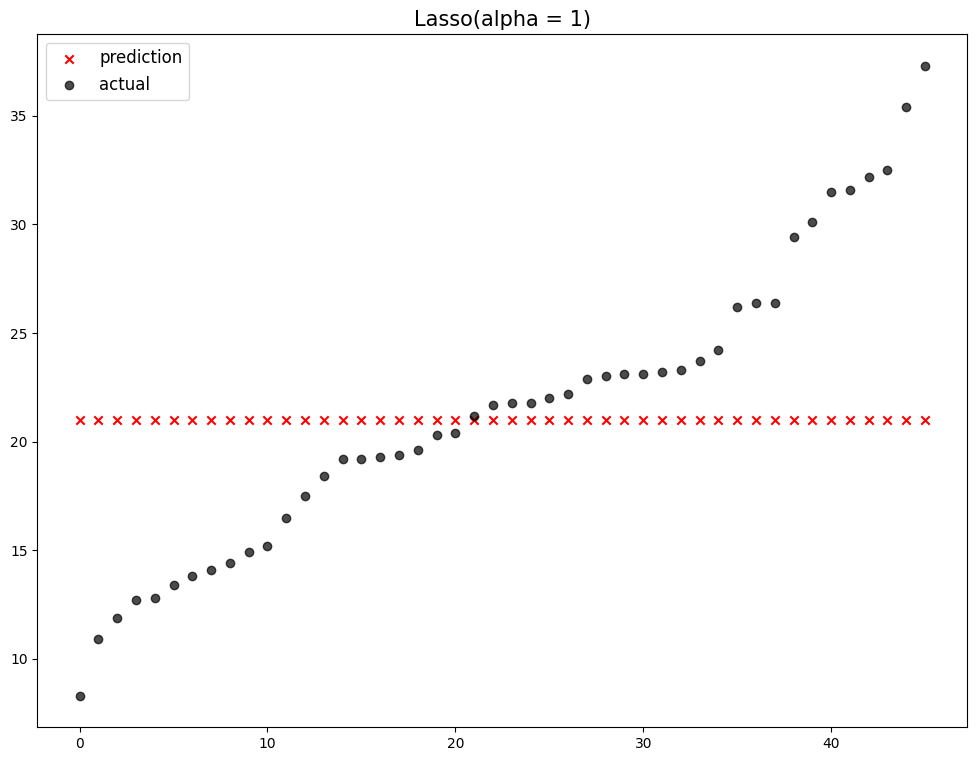


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 100)  6.673060
2   Lasso(alpha = 10)  6.673060
3    Lasso(alpha = 1)  6.673060


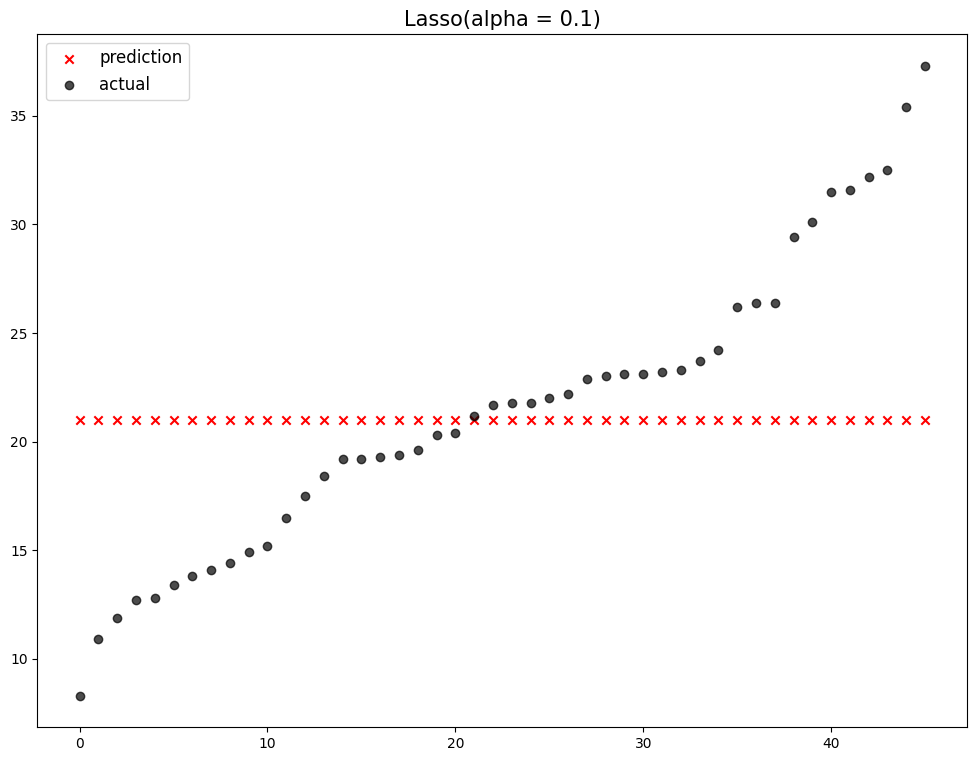


                model      rmse
0    LinearRegression  2.782956
1  Lasso(alpha = 100)  6.673060
2   Lasso(alpha = 10)  6.673060
3    Lasso(alpha = 1)  6.673060
4  Lasso(alpha = 0.1)  6.673060


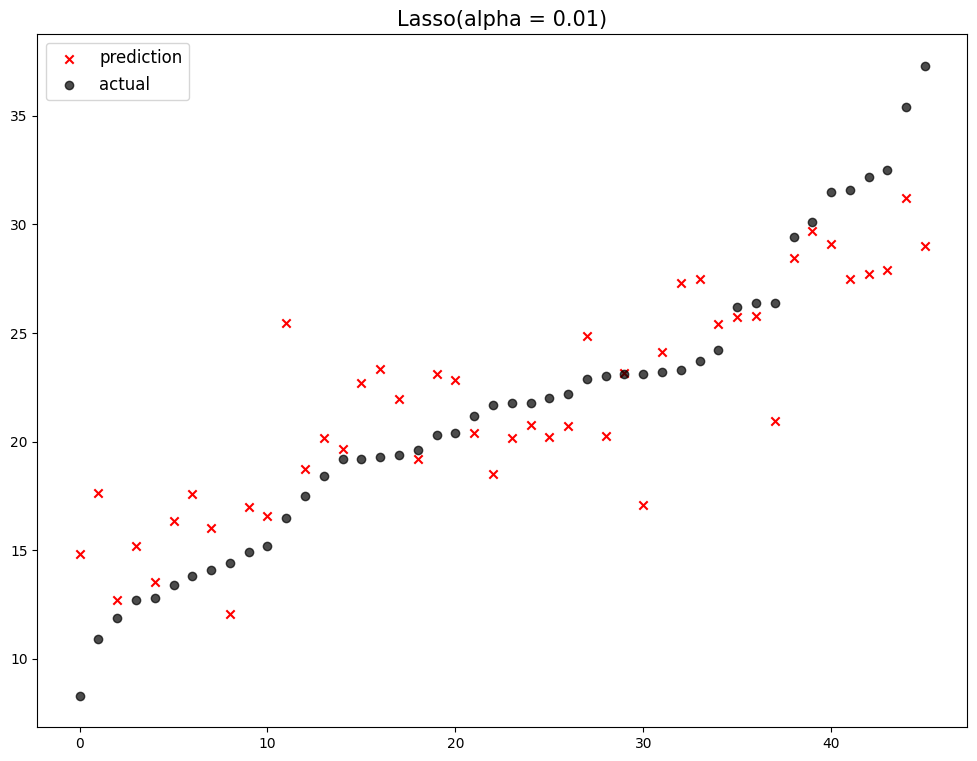


                 model      rmse
0     LinearRegression  2.782956
1  Lasso(alpha = 0.01)  3.459048
2   Lasso(alpha = 100)  6.673060
3    Lasso(alpha = 10)  6.673060
4     Lasso(alpha = 1)  6.673060
5   Lasso(alpha = 0.1)  6.673060


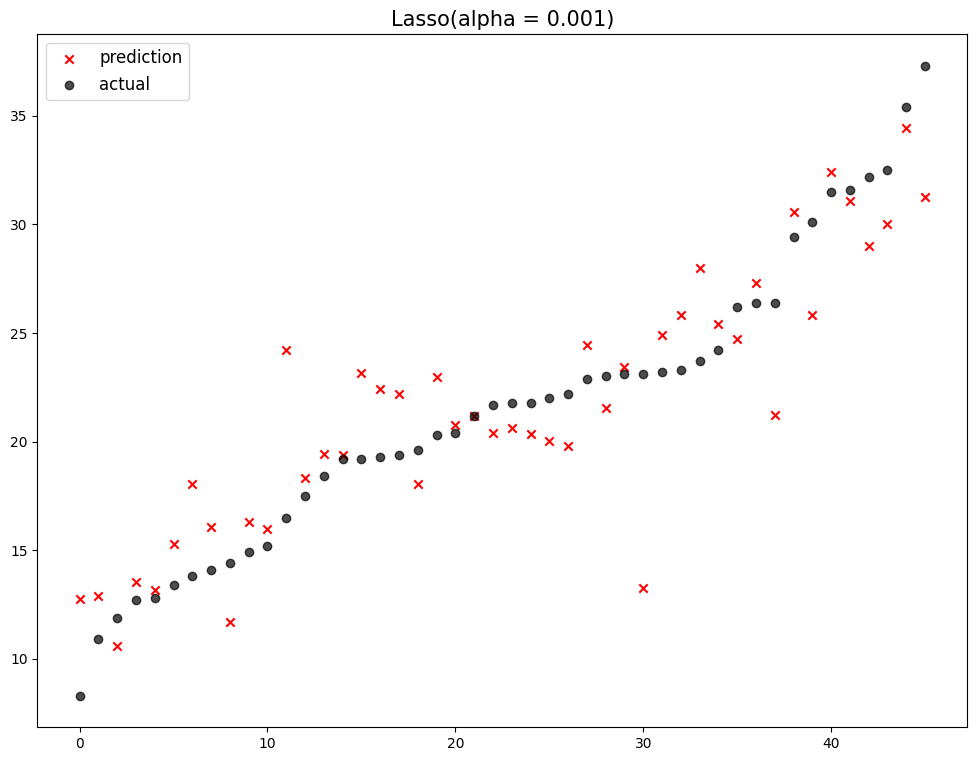


                  model      rmse
0      LinearRegression  2.782956
1  Lasso(alpha = 0.001)  3.005180
2   Lasso(alpha = 0.01)  3.459048
3    Lasso(alpha = 100)  6.673060
4     Lasso(alpha = 10)  6.673060
5      Lasso(alpha = 1)  6.673060
6    Lasso(alpha = 0.1)  6.673060


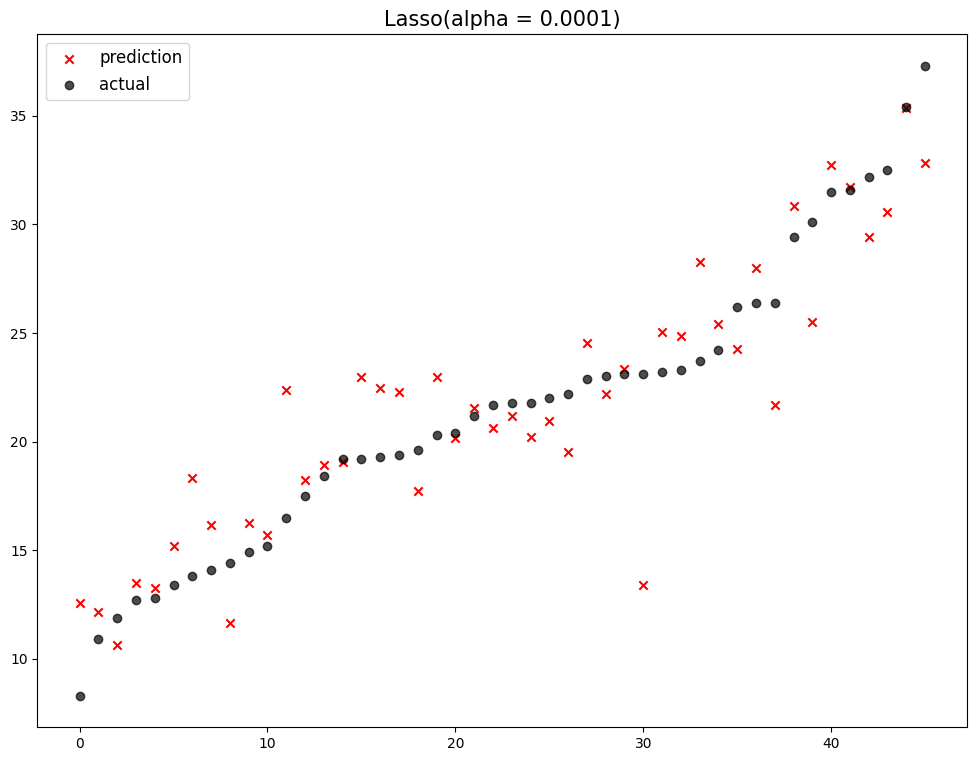


                   model      rmse
0       LinearRegression  2.782956
1  Lasso(alpha = 0.0001)  2.803865
2   Lasso(alpha = 0.001)  3.005180
3    Lasso(alpha = 0.01)  3.459048
4     Lasso(alpha = 100)  6.673060
5      Lasso(alpha = 10)  6.673060
6       Lasso(alpha = 1)  6.673060
7     Lasso(alpha = 0.1)  6.673060


In [29]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    lasso = Lasso(alpha = alpha) # 모델 객체 생성
    lasso.fit(scaled_X_train, scaled_y_train) # 학습
    pred = np.expm1(lasso.predict(scaled_X_valid)) # 예측
    rmse_eval('Lasso(alpha = {})'.format(alpha),pred,y_valid) # 평가 & 시각화

### **5-3. Ridge(Baseline에 제시된 모형)**

In [30]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

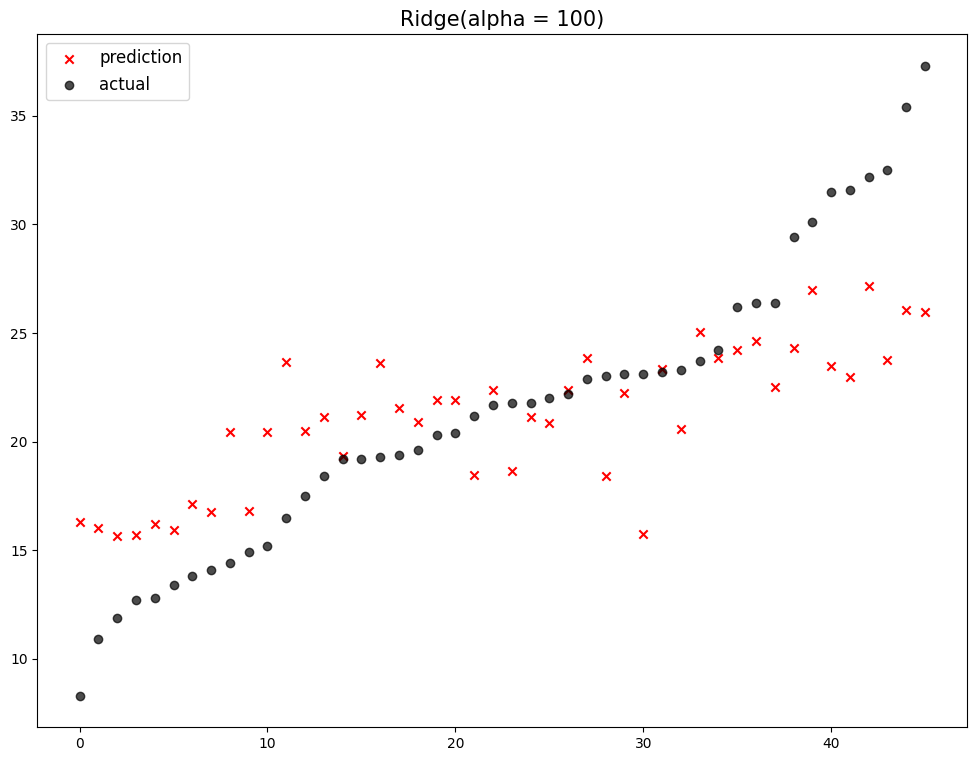


                   model      rmse
0       LinearRegression  2.782956
1  Lasso(alpha = 0.0001)  2.803865
2   Lasso(alpha = 0.001)  3.005180
3    Lasso(alpha = 0.01)  3.459048
4     Ridge(alpha = 100)  4.520142
5     Lasso(alpha = 100)  6.673060
6      Lasso(alpha = 10)  6.673060
7       Lasso(alpha = 1)  6.673060
8     Lasso(alpha = 0.1)  6.673060


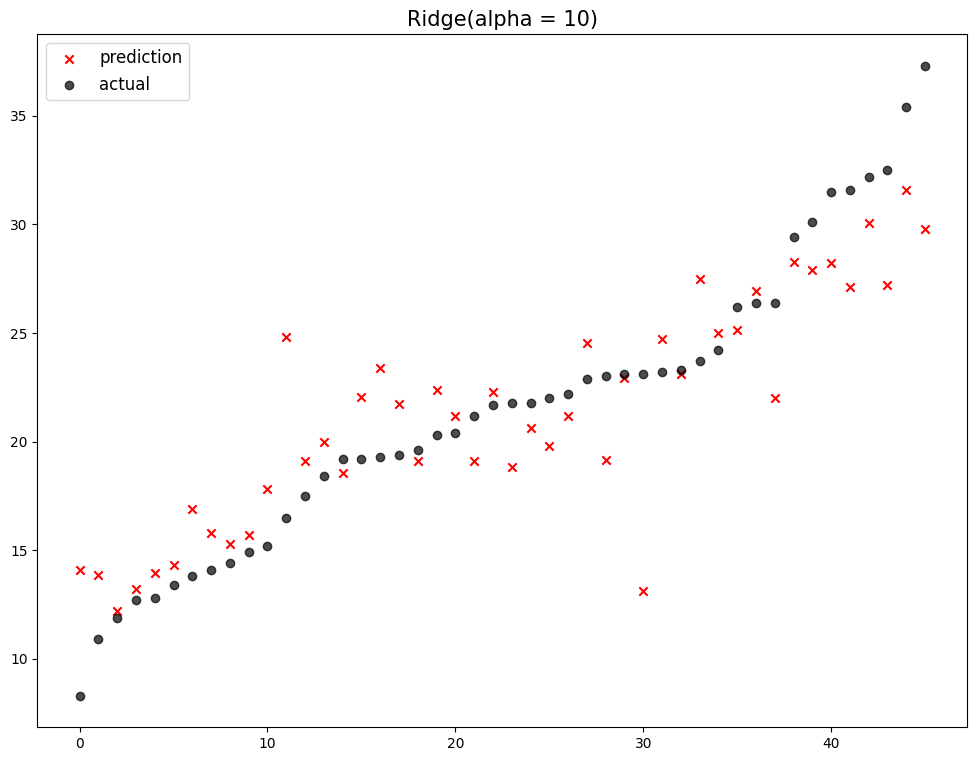


                   model      rmse
0       LinearRegression  2.782956
1  Lasso(alpha = 0.0001)  2.803865
2   Lasso(alpha = 0.001)  3.005180
3      Ridge(alpha = 10)  3.268830
4    Lasso(alpha = 0.01)  3.459048
5     Ridge(alpha = 100)  4.520142
6     Lasso(alpha = 100)  6.673060
7      Lasso(alpha = 10)  6.673060
8       Lasso(alpha = 1)  6.673060
9     Lasso(alpha = 0.1)  6.673060


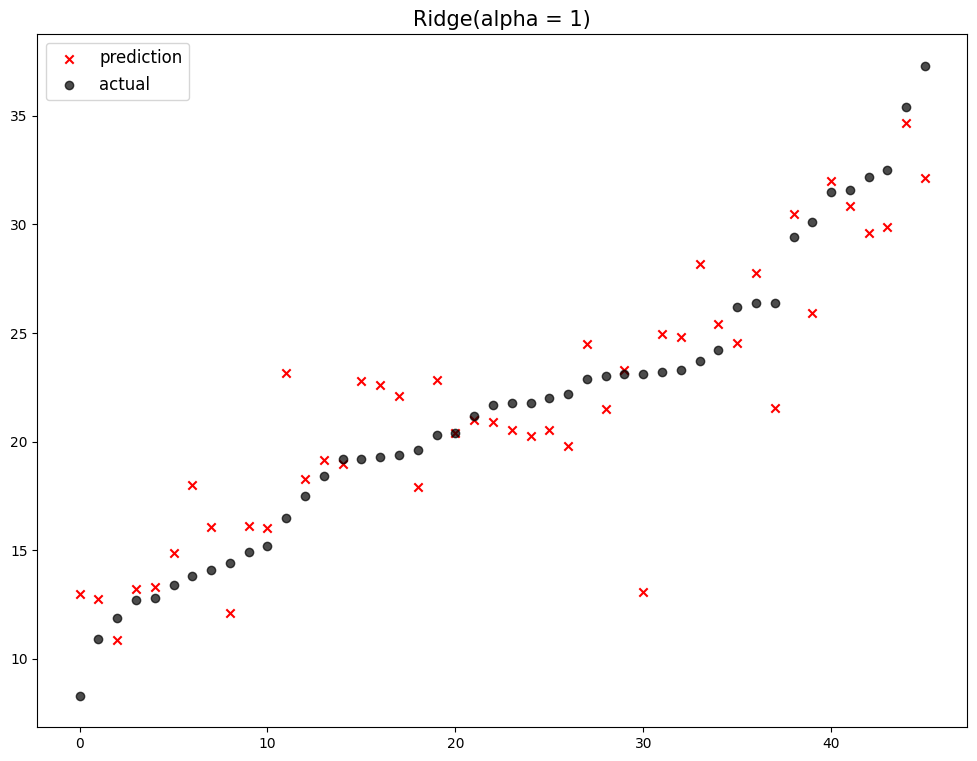


                    model      rmse
0        LinearRegression  2.782956
1   Lasso(alpha = 0.0001)  2.803865
2        Ridge(alpha = 1)  2.862449
3    Lasso(alpha = 0.001)  3.005180
4       Ridge(alpha = 10)  3.268830
5     Lasso(alpha = 0.01)  3.459048
6      Ridge(alpha = 100)  4.520142
7      Lasso(alpha = 100)  6.673060
8       Lasso(alpha = 10)  6.673060
9        Lasso(alpha = 1)  6.673060
10     Lasso(alpha = 0.1)  6.673060


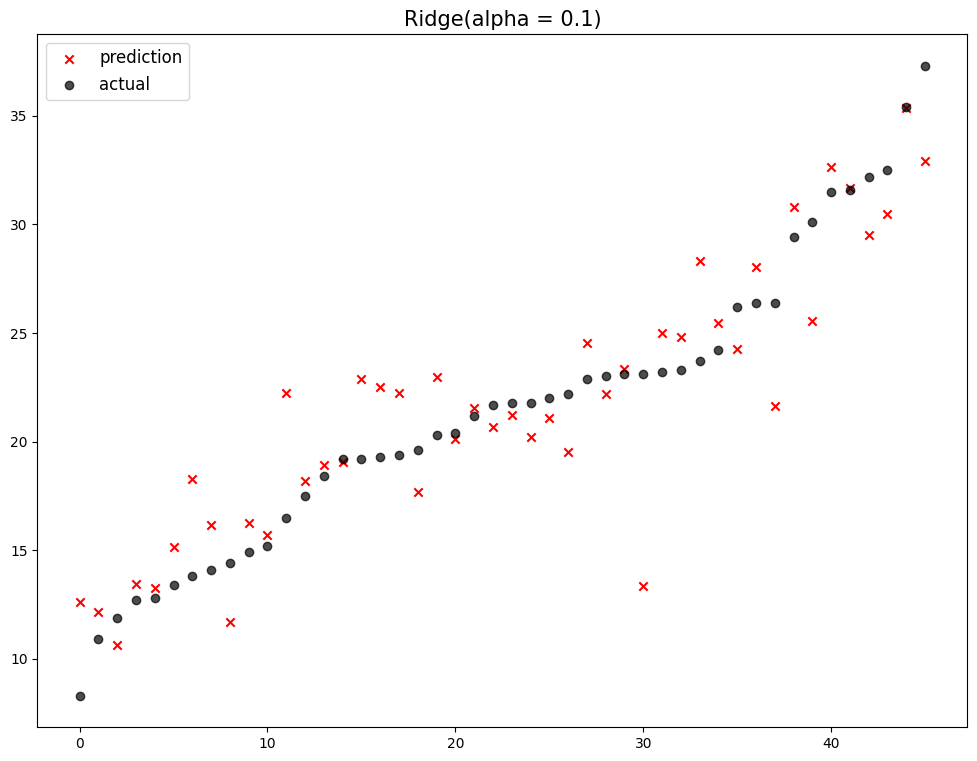


                    model      rmse
0        LinearRegression  2.782956
1      Ridge(alpha = 0.1)  2.791931
2   Lasso(alpha = 0.0001)  2.803865
3        Ridge(alpha = 1)  2.862449
4    Lasso(alpha = 0.001)  3.005180
5       Ridge(alpha = 10)  3.268830
6     Lasso(alpha = 0.01)  3.459048
7      Ridge(alpha = 100)  4.520142
8      Lasso(alpha = 100)  6.673060
9       Lasso(alpha = 10)  6.673060
10       Lasso(alpha = 1)  6.673060
11     Lasso(alpha = 0.1)  6.673060


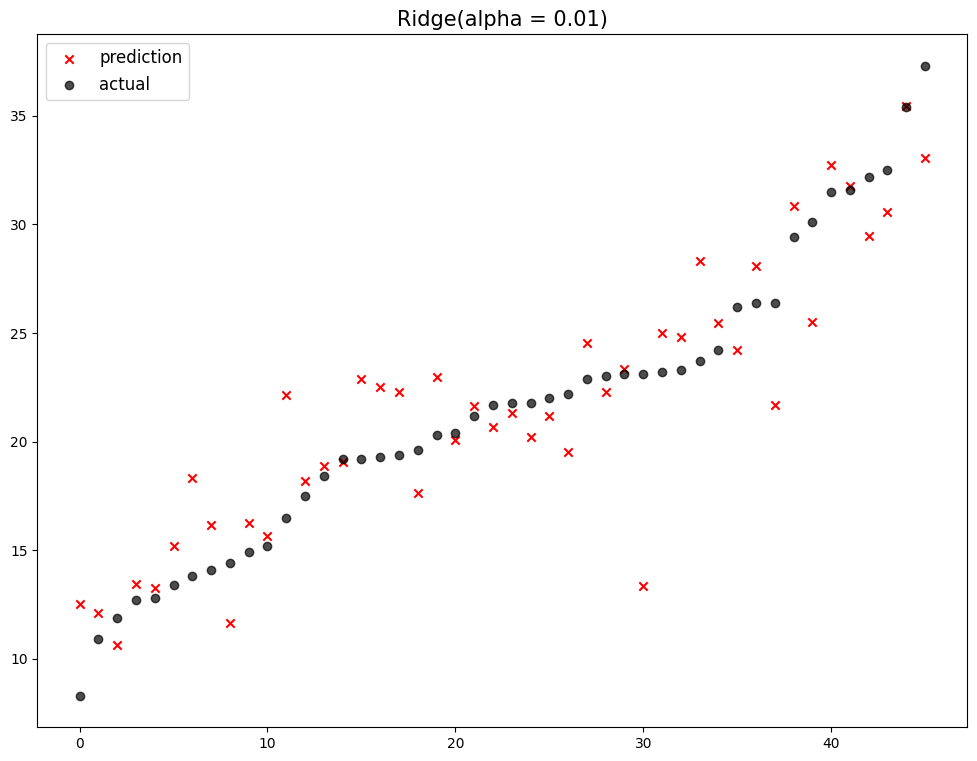


                    model      rmse
0        LinearRegression  2.782956
1     Ridge(alpha = 0.01)  2.783862
2      Ridge(alpha = 0.1)  2.791931
3   Lasso(alpha = 0.0001)  2.803865
4        Ridge(alpha = 1)  2.862449
5    Lasso(alpha = 0.001)  3.005180
6       Ridge(alpha = 10)  3.268830
7     Lasso(alpha = 0.01)  3.459048
8      Ridge(alpha = 100)  4.520142
9      Lasso(alpha = 100)  6.673060
10      Lasso(alpha = 10)  6.673060
11       Lasso(alpha = 1)  6.673060
12     Lasso(alpha = 0.1)  6.673060


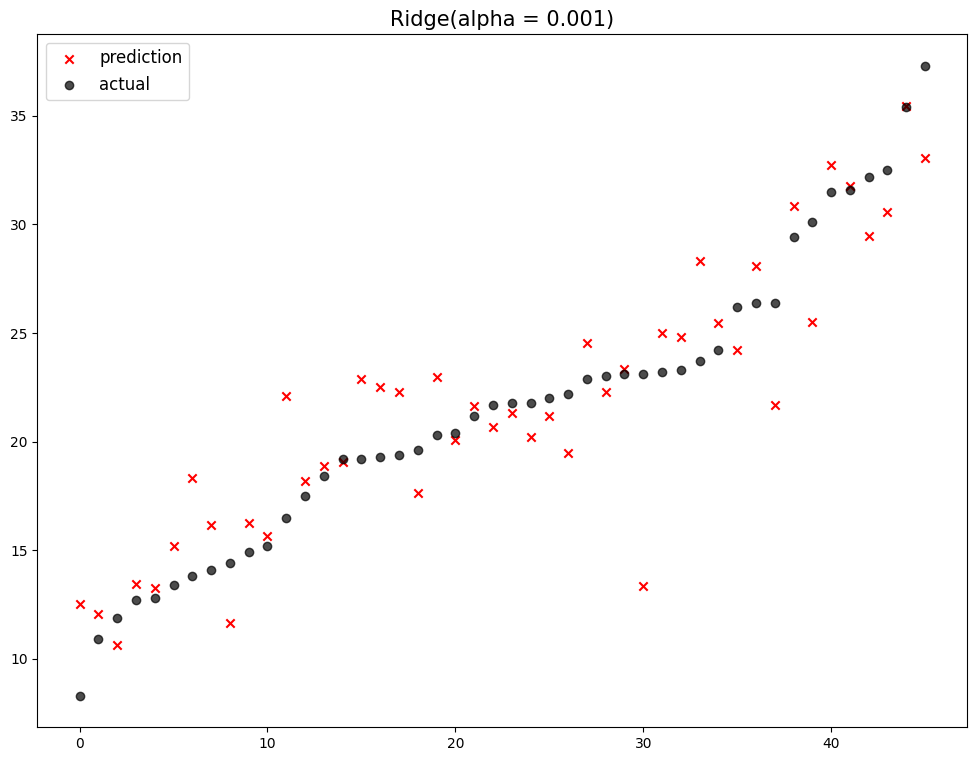


                    model      rmse
0        LinearRegression  2.782956
1    Ridge(alpha = 0.001)  2.783047
2     Ridge(alpha = 0.01)  2.783862
3      Ridge(alpha = 0.1)  2.791931
4   Lasso(alpha = 0.0001)  2.803865
5        Ridge(alpha = 1)  2.862449
6    Lasso(alpha = 0.001)  3.005180
7       Ridge(alpha = 10)  3.268830
8     Lasso(alpha = 0.01)  3.459048
9      Ridge(alpha = 100)  4.520142
10     Lasso(alpha = 100)  6.673060
11      Lasso(alpha = 10)  6.673060
12       Lasso(alpha = 1)  6.673060
13     Lasso(alpha = 0.1)  6.673060


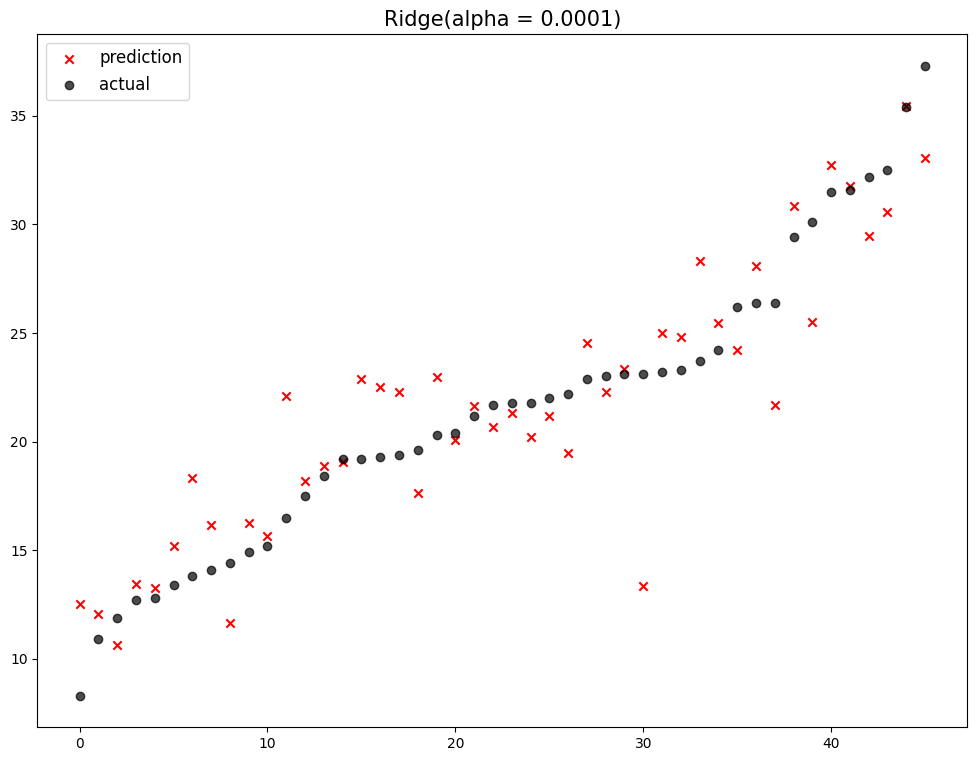


                    model      rmse
0        LinearRegression  2.782956
1   Ridge(alpha = 0.0001)  2.782965
2    Ridge(alpha = 0.001)  2.783047
3     Ridge(alpha = 0.01)  2.783862
4      Ridge(alpha = 0.1)  2.791931
5   Lasso(alpha = 0.0001)  2.803865
6        Ridge(alpha = 1)  2.862449
7    Lasso(alpha = 0.001)  3.005180
8       Ridge(alpha = 10)  3.268830
9     Lasso(alpha = 0.01)  3.459048
10     Ridge(alpha = 100)  4.520142
11     Lasso(alpha = 100)  6.673060
12      Lasso(alpha = 10)  6.673060
13       Lasso(alpha = 1)  6.673060
14     Lasso(alpha = 0.1)  6.673060


In [31]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    ridge = Ridge(alpha = alpha) # 모델 객체 생성
    ridge.fit(scaled_X_train, scaled_y_train) # 학습
    pred = np.expm1(ridge.predict(scaled_X_valid)) # 예측
    rmse_eval('Ridge(alpha = {})'.format(alpha),pred,y_valid) # 평가 & 시각화

### **5-5. 엘라스틱넷(ElasticNet)**
- L1 규제 + L2 규제
- l1_ratio(default = 0.5) 속성: 규제의 정도 조정
  * l1_ratio = 0: L2 규제만 사용
  * l1_ratio = 1: L1 규제만 사용
  * 0 < l1_ratio < 1(L1 and L2 규제를 혼합 사용)

In [32]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정
ratios = [0.2,0.5,0.8] # l1 규제 혼합 비율

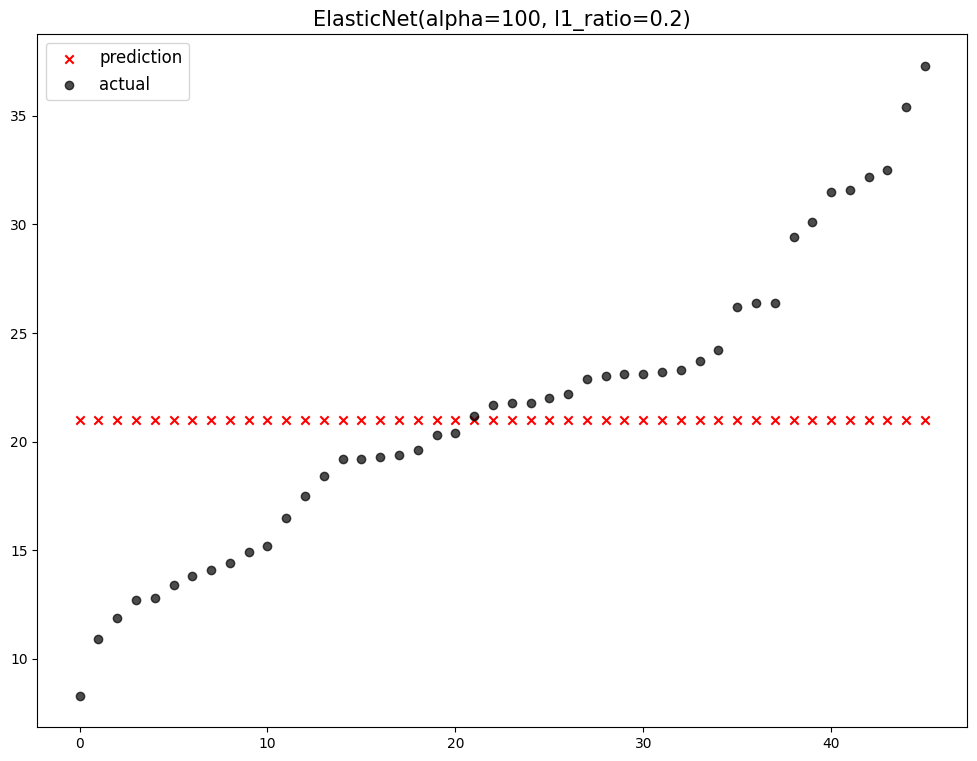


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060


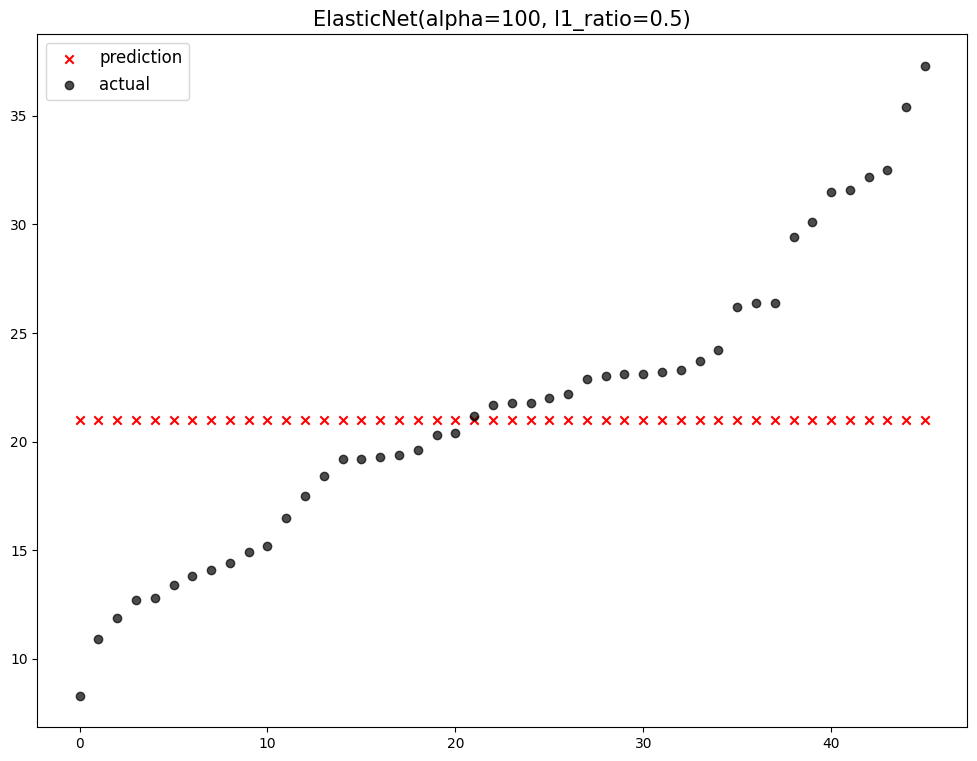


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060


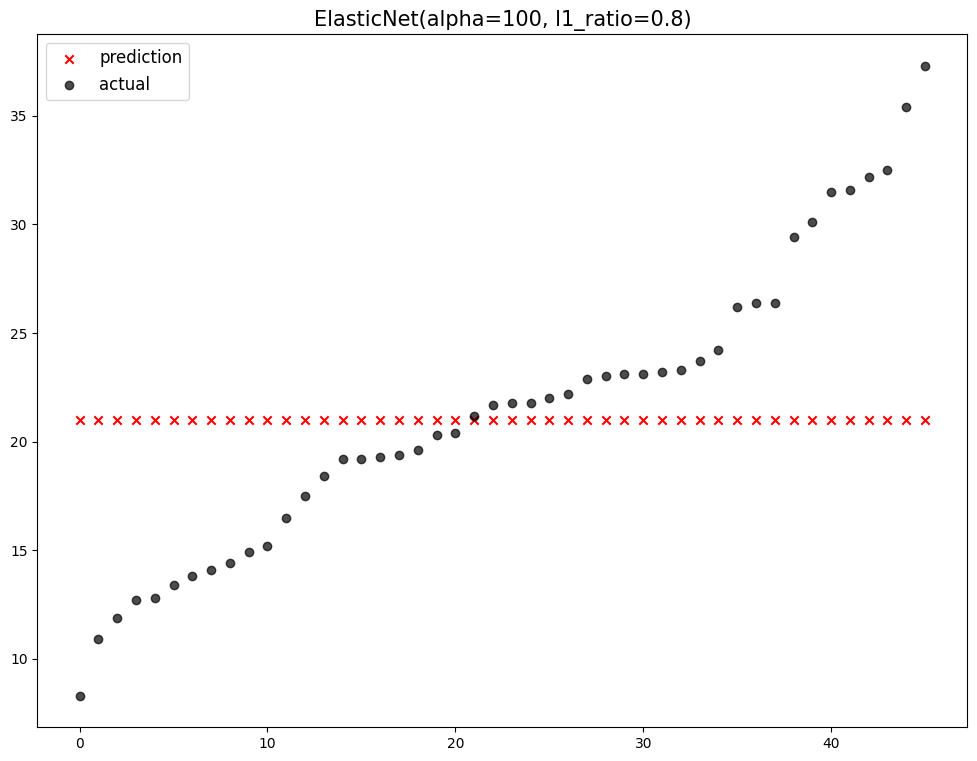


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060


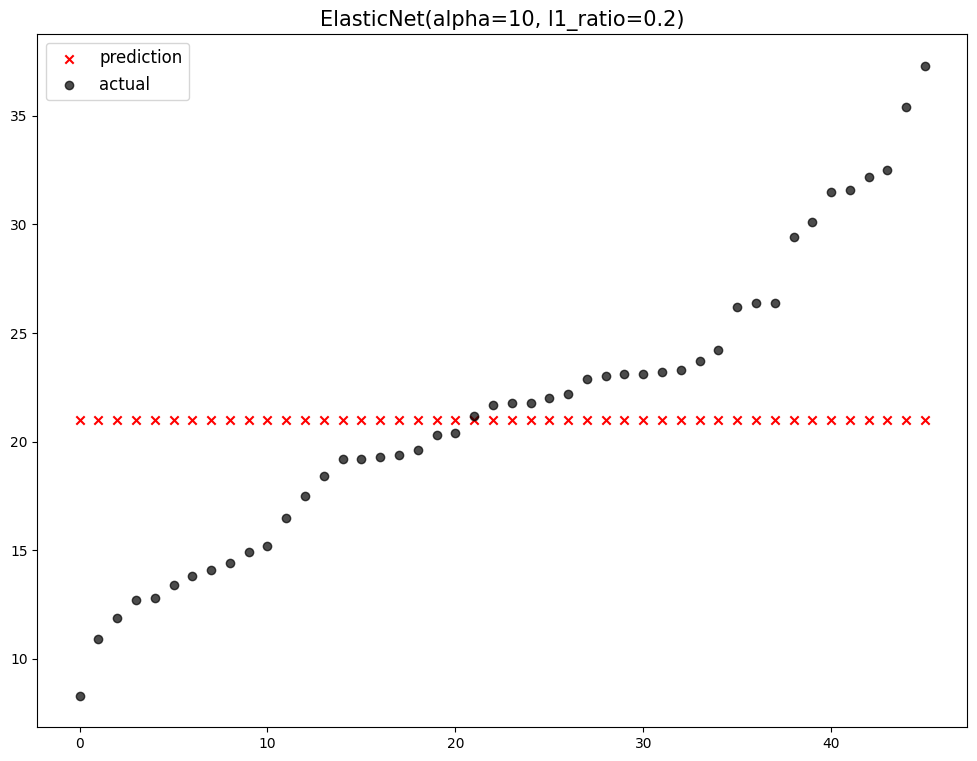


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

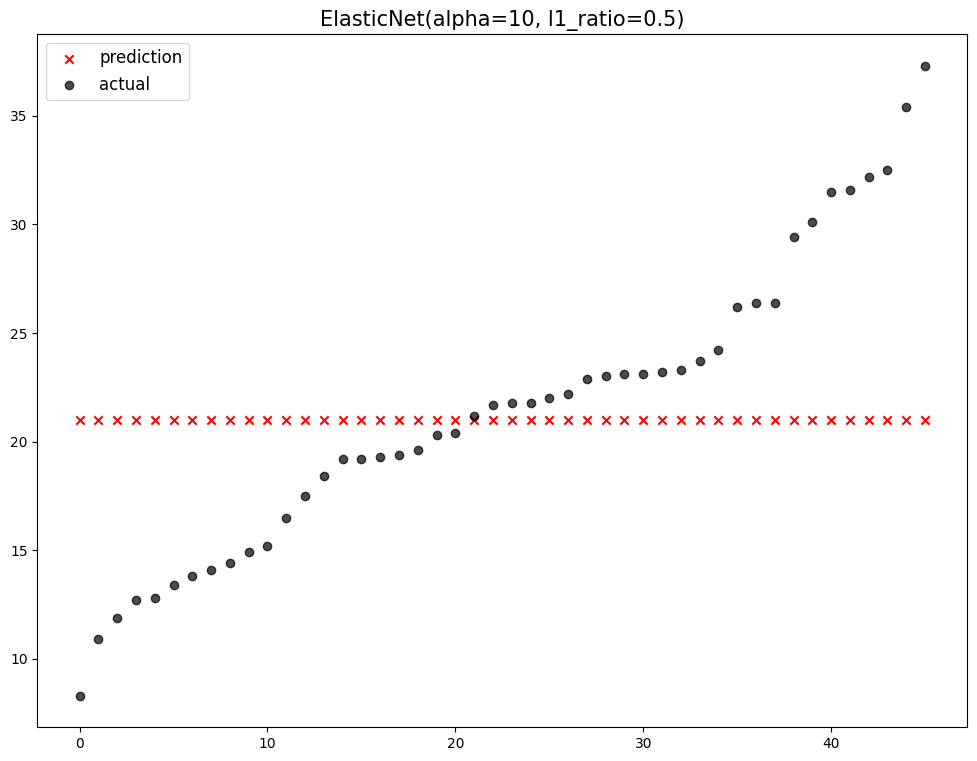


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

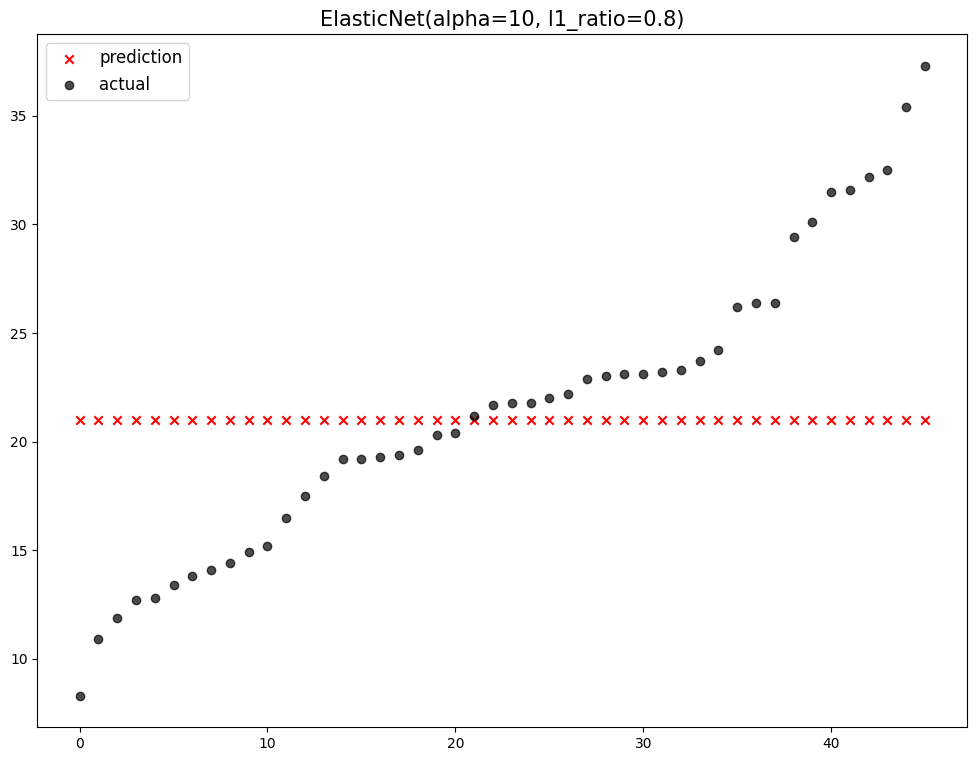


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

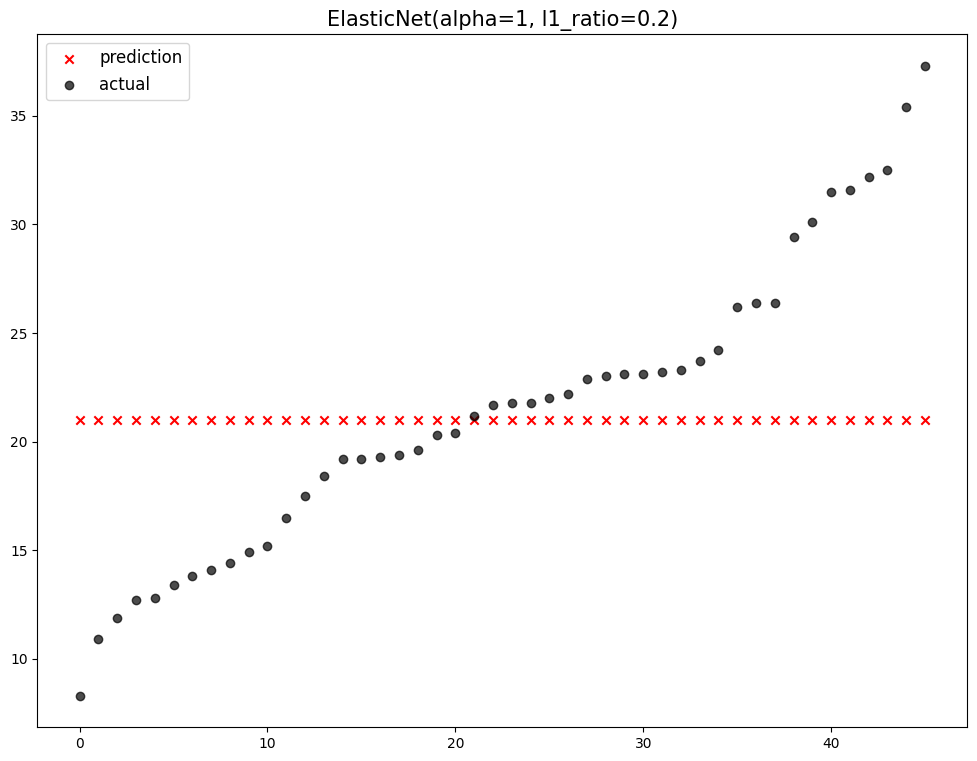


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

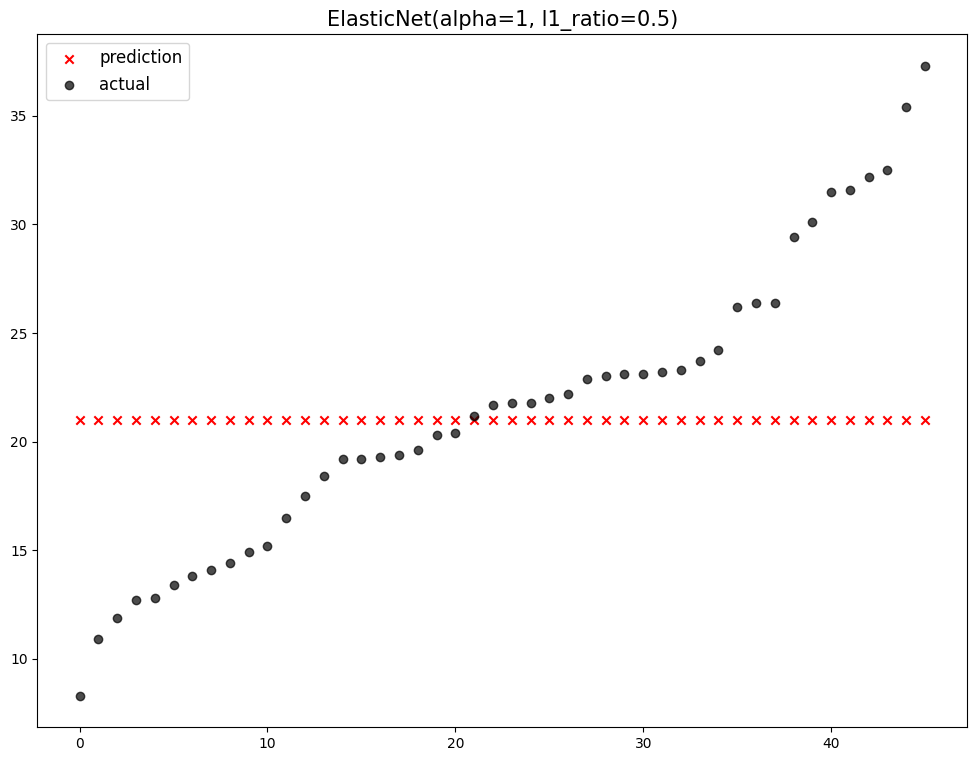


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

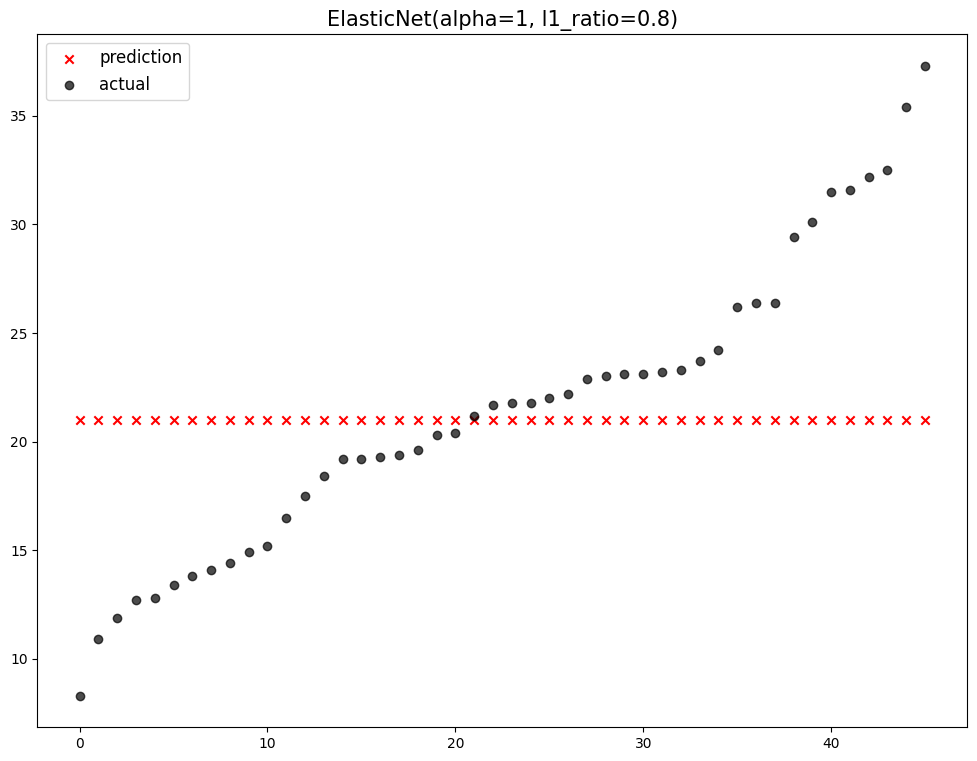


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11                   Lasso(alpha = 100)  6.673060
12                    Lasso(alpha = 10)  6.673060
13                     Lasso(alpha = 1)  6.673060
14                   Lasso(alpha = 0.1)  6.673060
15  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060
18   ElasticNet(alpha=10, l1_ratio=0.2)  6.673060

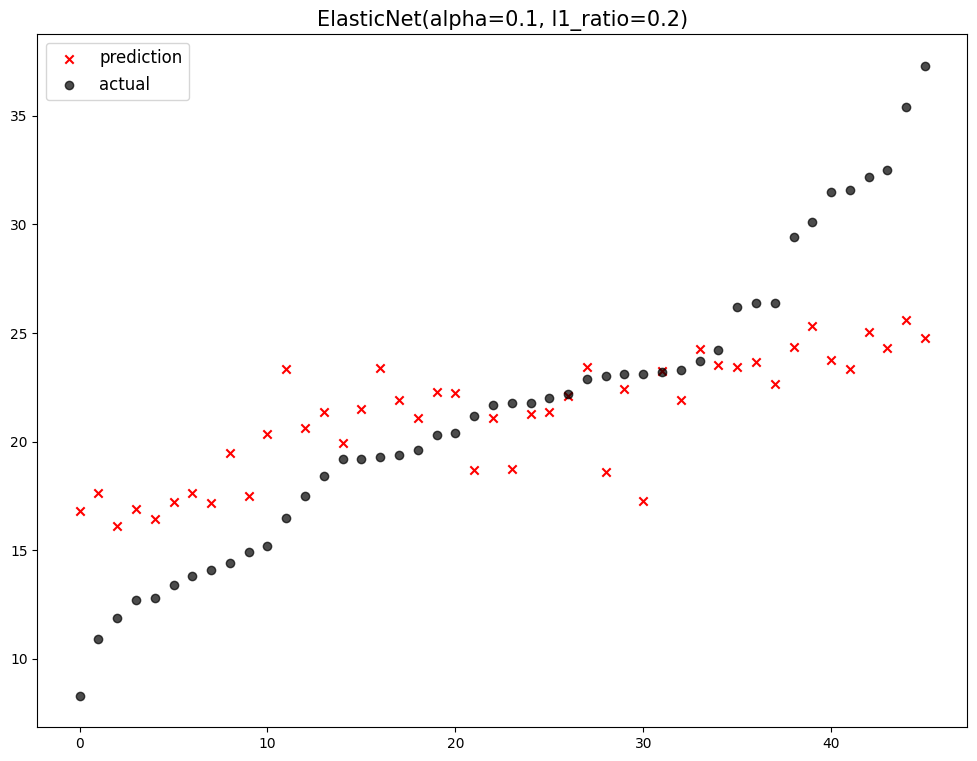


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11  ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
12                   Lasso(alpha = 100)  6.673060
13                    Lasso(alpha = 10)  6.673060
14                     Lasso(alpha = 1)  6.673060
15                   Lasso(alpha = 0.1)  6.673060
16  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.8)  6.673060

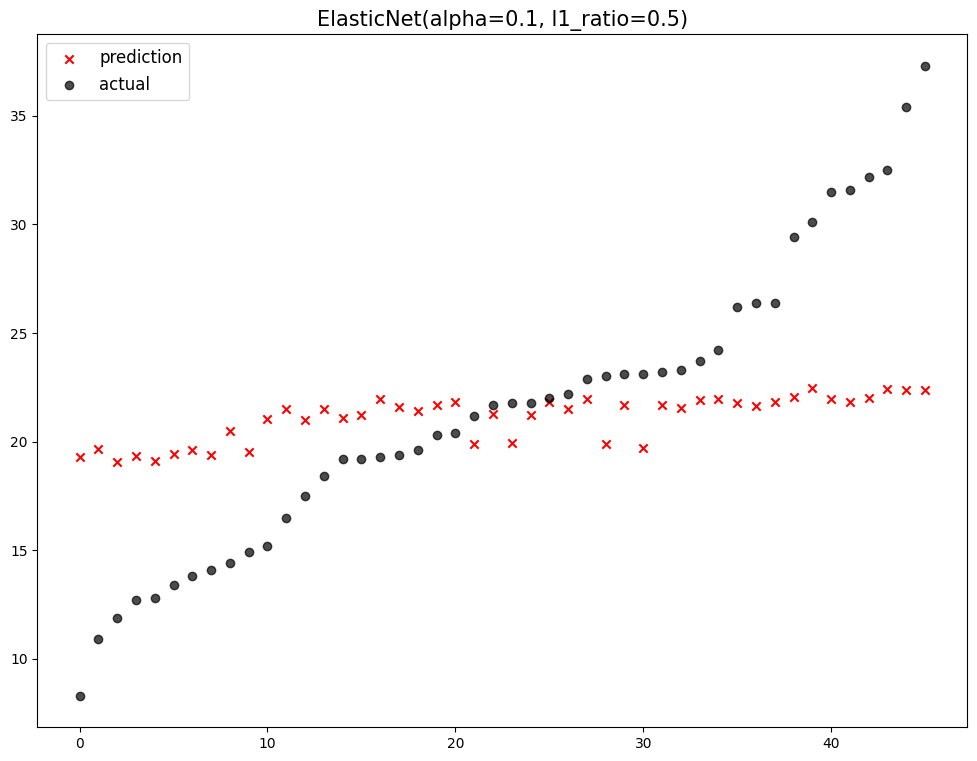


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11  ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
12  ElasticNet(alpha=0.1, l1_ratio=0.5)  5.900464
13                   Lasso(alpha = 100)  6.673060
14                    Lasso(alpha = 10)  6.673060
15                     Lasso(alpha = 1)  6.673060
16                   Lasso(alpha = 0.1)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060

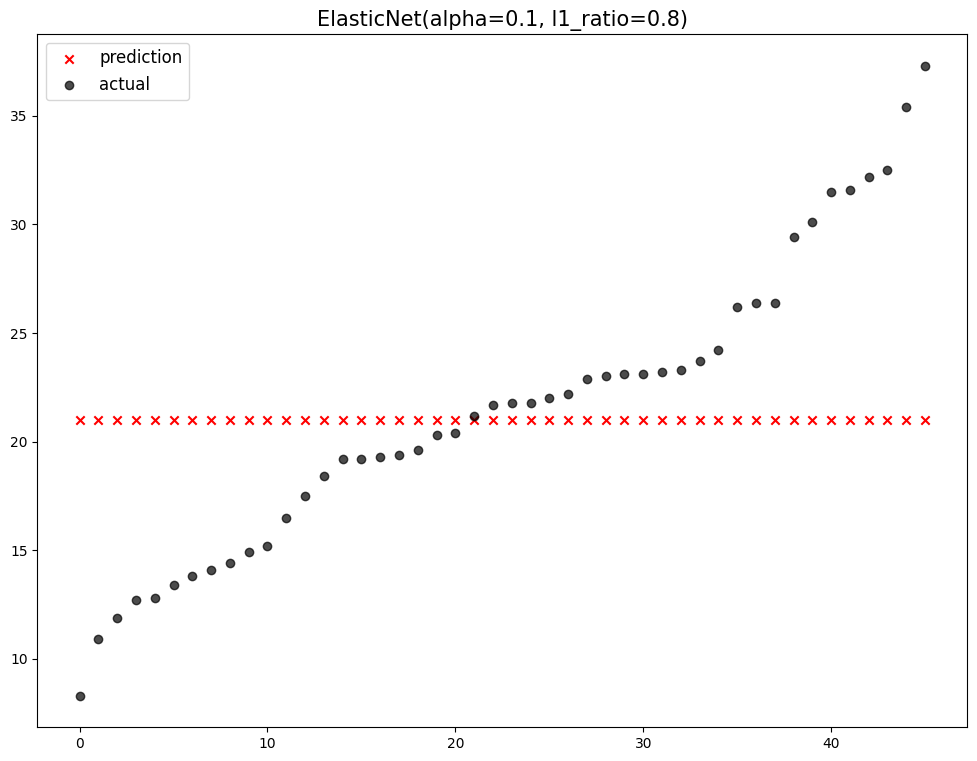


                                  model      rmse
0                      LinearRegression  2.782956
1                 Ridge(alpha = 0.0001)  2.782965
2                  Ridge(alpha = 0.001)  2.783047
3                   Ridge(alpha = 0.01)  2.783862
4                    Ridge(alpha = 0.1)  2.791931
5                 Lasso(alpha = 0.0001)  2.803865
6                      Ridge(alpha = 1)  2.862449
7                  Lasso(alpha = 0.001)  3.005180
8                     Ridge(alpha = 10)  3.268830
9                   Lasso(alpha = 0.01)  3.459048
10                   Ridge(alpha = 100)  4.520142
11  ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
12  ElasticNet(alpha=0.1, l1_ratio=0.5)  5.900464
13                   Lasso(alpha = 100)  6.673060
14                    Lasso(alpha = 10)  6.673060
15                     Lasso(alpha = 1)  6.673060
16                   Lasso(alpha = 0.1)  6.673060
17  ElasticNet(alpha=100, l1_ratio=0.2)  6.673060
18  ElasticNet(alpha=100, l1_ratio=0.5)  6.673060

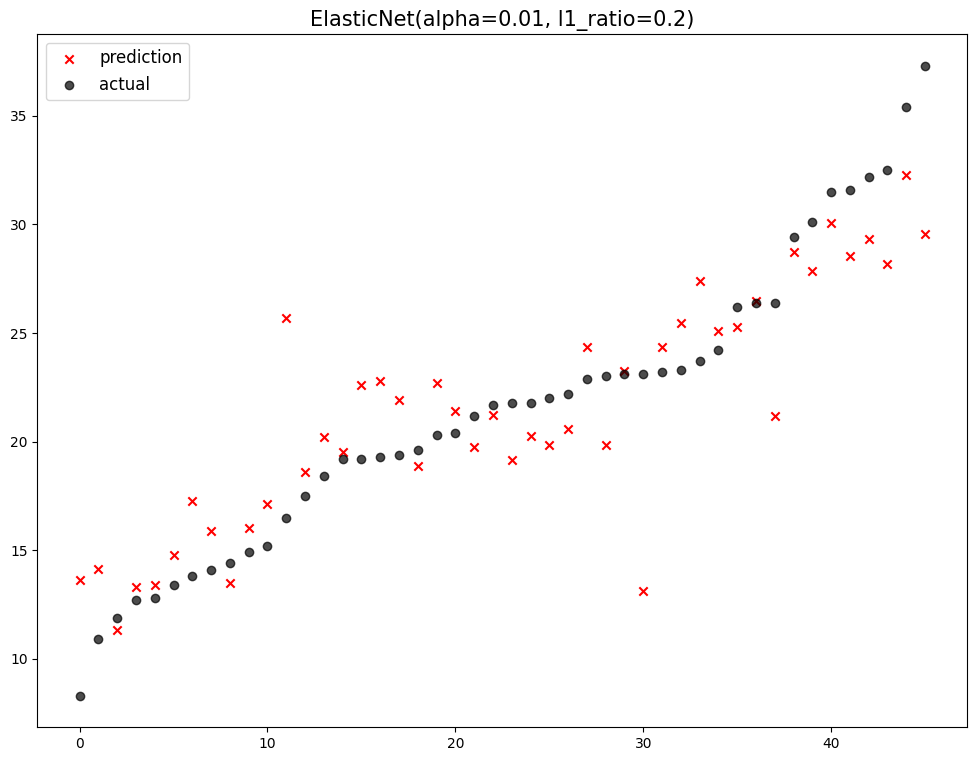


                                   model      rmse
0                       LinearRegression  2.782956
1                  Ridge(alpha = 0.0001)  2.782965
2                   Ridge(alpha = 0.001)  2.783047
3                    Ridge(alpha = 0.01)  2.783862
4                     Ridge(alpha = 0.1)  2.791931
5                  Lasso(alpha = 0.0001)  2.803865
6                       Ridge(alpha = 1)  2.862449
7                   Lasso(alpha = 0.001)  3.005180
8   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
9                      Ridge(alpha = 10)  3.268830
10                   Lasso(alpha = 0.01)  3.459048
11                    Ridge(alpha = 100)  4.520142
12   ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
13   ElasticNet(alpha=0.1, l1_ratio=0.5)  5.900464
14                    Lasso(alpha = 100)  6.673060
15                     Lasso(alpha = 10)  6.673060
16                      Lasso(alpha = 1)  6.673060
17                    Lasso(alpha = 0.1)  6.673060
18   ElasticNet(alpha=100, l1_

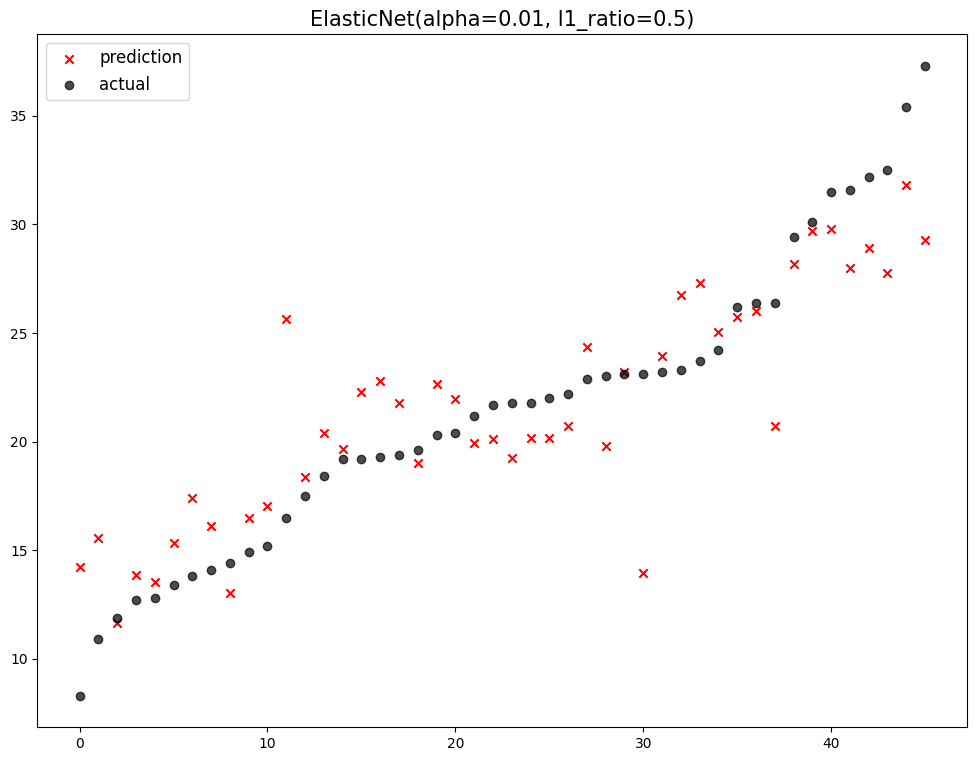


                                   model      rmse
0                       LinearRegression  2.782956
1                  Ridge(alpha = 0.0001)  2.782965
2                   Ridge(alpha = 0.001)  2.783047
3                    Ridge(alpha = 0.01)  2.783862
4                     Ridge(alpha = 0.1)  2.791931
5                  Lasso(alpha = 0.0001)  2.803865
6                       Ridge(alpha = 1)  2.862449
7                   Lasso(alpha = 0.001)  3.005180
8   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
9                      Ridge(alpha = 10)  3.268830
10  ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
11                   Lasso(alpha = 0.01)  3.459048
12                    Ridge(alpha = 100)  4.520142
13   ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
14   ElasticNet(alpha=0.1, l1_ratio=0.5)  5.900464
15                    Lasso(alpha = 100)  6.673060
16                     Lasso(alpha = 10)  6.673060
17                      Lasso(alpha = 1)  6.673060
18                    Lasso(al

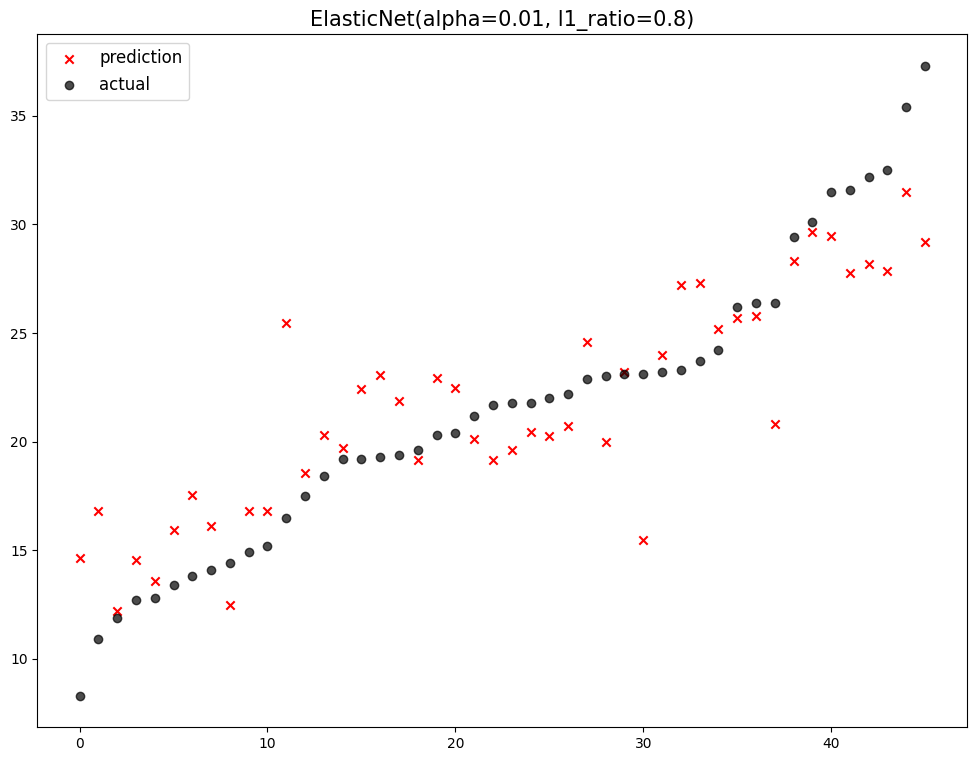


                                   model      rmse
0                       LinearRegression  2.782956
1                  Ridge(alpha = 0.0001)  2.782965
2                   Ridge(alpha = 0.001)  2.783047
3                    Ridge(alpha = 0.01)  2.783862
4                     Ridge(alpha = 0.1)  2.791931
5                  Lasso(alpha = 0.0001)  2.803865
6                       Ridge(alpha = 1)  2.862449
7                   Lasso(alpha = 0.001)  3.005180
8   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
9                      Ridge(alpha = 10)  3.268830
10  ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
11  ElasticNet(alpha=0.01, l1_ratio=0.8)  3.398561
12                   Lasso(alpha = 0.01)  3.459048
13                    Ridge(alpha = 100)  4.520142
14   ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
15   ElasticNet(alpha=0.1, l1_ratio=0.5)  5.900464
16                    Lasso(alpha = 100)  6.673060
17                     Lasso(alpha = 10)  6.673060
18                      Lasso(

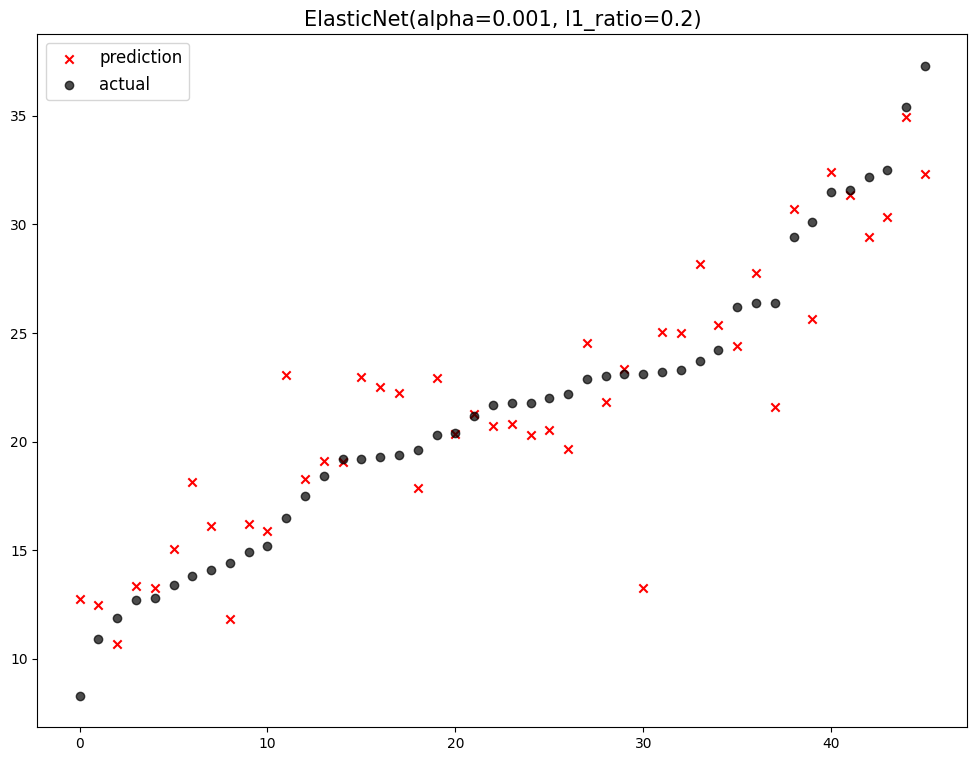


                                    model      rmse
0                        LinearRegression  2.782956
1                   Ridge(alpha = 0.0001)  2.782965
2                    Ridge(alpha = 0.001)  2.783047
3                     Ridge(alpha = 0.01)  2.783862
4                      Ridge(alpha = 0.1)  2.791931
5                   Lasso(alpha = 0.0001)  2.803865
6   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
7                        Ridge(alpha = 1)  2.862449
8                    Lasso(alpha = 0.001)  3.005180
9    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
10                      Ridge(alpha = 10)  3.268830
11   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
12   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.398561
13                    Lasso(alpha = 0.01)  3.459048
14                     Ridge(alpha = 100)  4.520142
15    ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
16    ElasticNet(alpha=0.1, l1_ratio=0.5)  5.900464
17                     Lasso(alpha = 100)  6.673060
18         

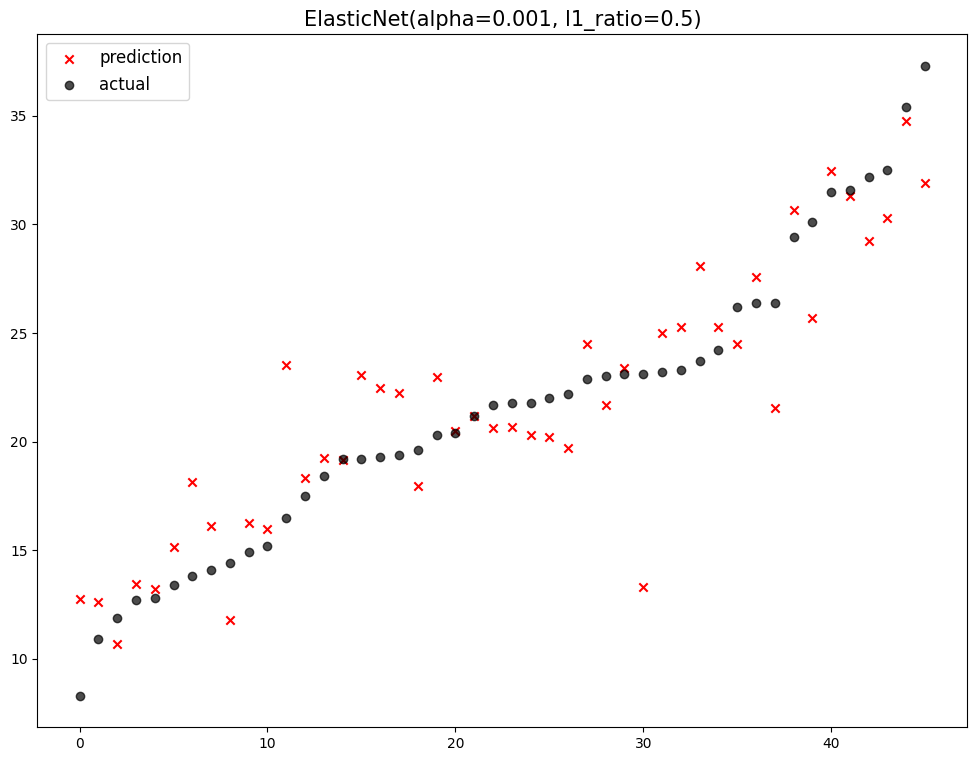


                                    model      rmse
0                        LinearRegression  2.782956
1                   Ridge(alpha = 0.0001)  2.782965
2                    Ridge(alpha = 0.001)  2.783047
3                     Ridge(alpha = 0.01)  2.783862
4                      Ridge(alpha = 0.1)  2.791931
5                   Lasso(alpha = 0.0001)  2.803865
6   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
7                        Ridge(alpha = 1)  2.862449
8   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
9                    Lasso(alpha = 0.001)  3.005180
10   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
11                      Ridge(alpha = 10)  3.268830
12   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
13   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.398561
14                    Lasso(alpha = 0.01)  3.459048
15                     Ridge(alpha = 100)  4.520142
16    ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
17    ElasticNet(alpha=0.1, l1_ratio=0.5)  5.900464
18         

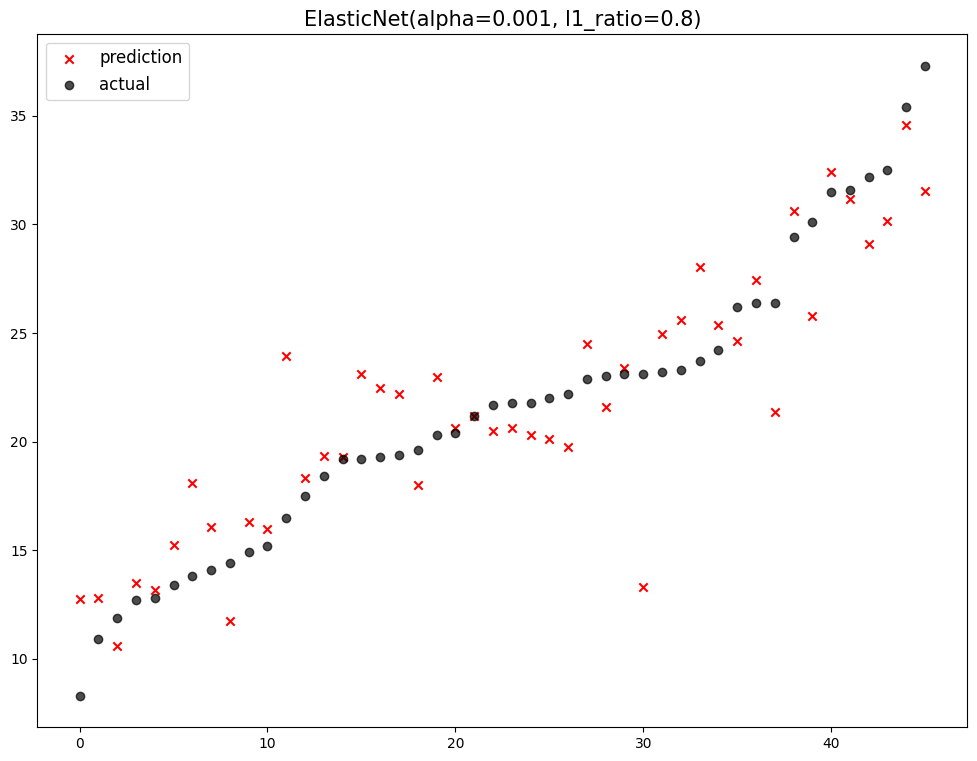


                                    model      rmse
0                        LinearRegression  2.782956
1                   Ridge(alpha = 0.0001)  2.782965
2                    Ridge(alpha = 0.001)  2.783047
3                     Ridge(alpha = 0.01)  2.783862
4                      Ridge(alpha = 0.1)  2.791931
5                   Lasso(alpha = 0.0001)  2.803865
6   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
7                        Ridge(alpha = 1)  2.862449
8   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
9   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
10                   Lasso(alpha = 0.001)  3.005180
11   ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
12                      Ridge(alpha = 10)  3.268830
13   ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
14   ElasticNet(alpha=0.01, l1_ratio=0.8)  3.398561
15                    Lasso(alpha = 0.01)  3.459048
16                     Ridge(alpha = 100)  4.520142
17    ElasticNet(alpha=0.1, l1_ratio=0.2)  4.706253
18    Elast

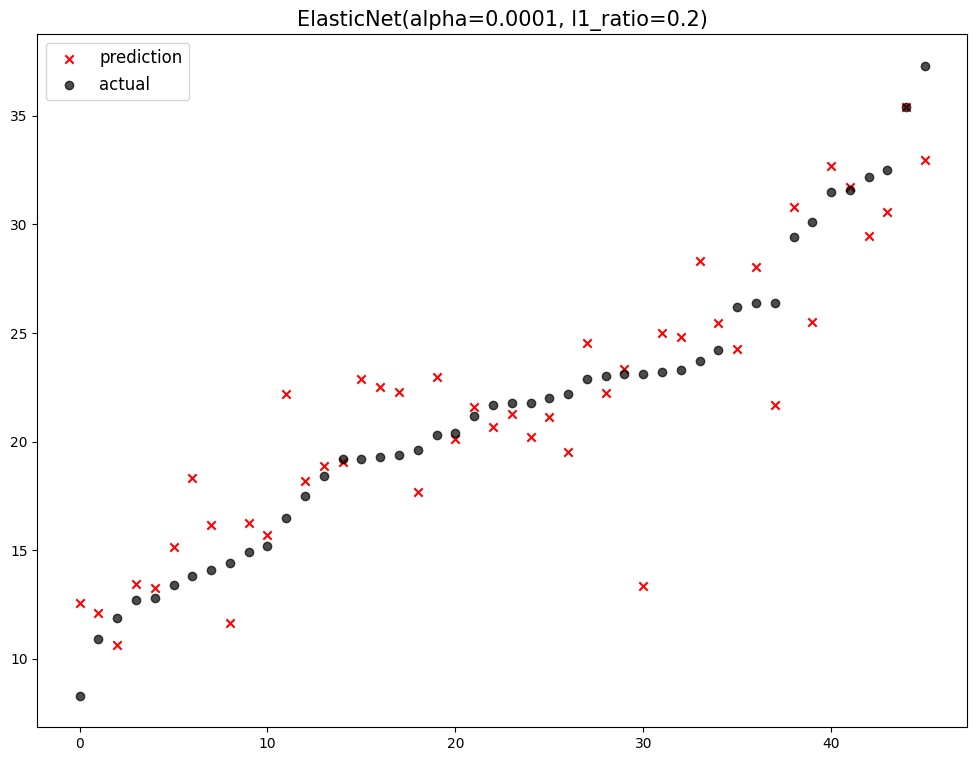


                                     model      rmse
0                         LinearRegression  2.782956
1                    Ridge(alpha = 0.0001)  2.782965
2                     Ridge(alpha = 0.001)  2.783047
3                      Ridge(alpha = 0.01)  2.783862
4   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
5                       Ridge(alpha = 0.1)  2.791931
6                    Lasso(alpha = 0.0001)  2.803865
7    ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
8                         Ridge(alpha = 1)  2.862449
9    ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
10   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
11                    Lasso(alpha = 0.001)  3.005180
12    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
13                       Ridge(alpha = 10)  3.268830
14    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
15    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.398561
16                     Lasso(alpha = 0.01)  3.459048
17                      Ridge(alpha = 100)  4

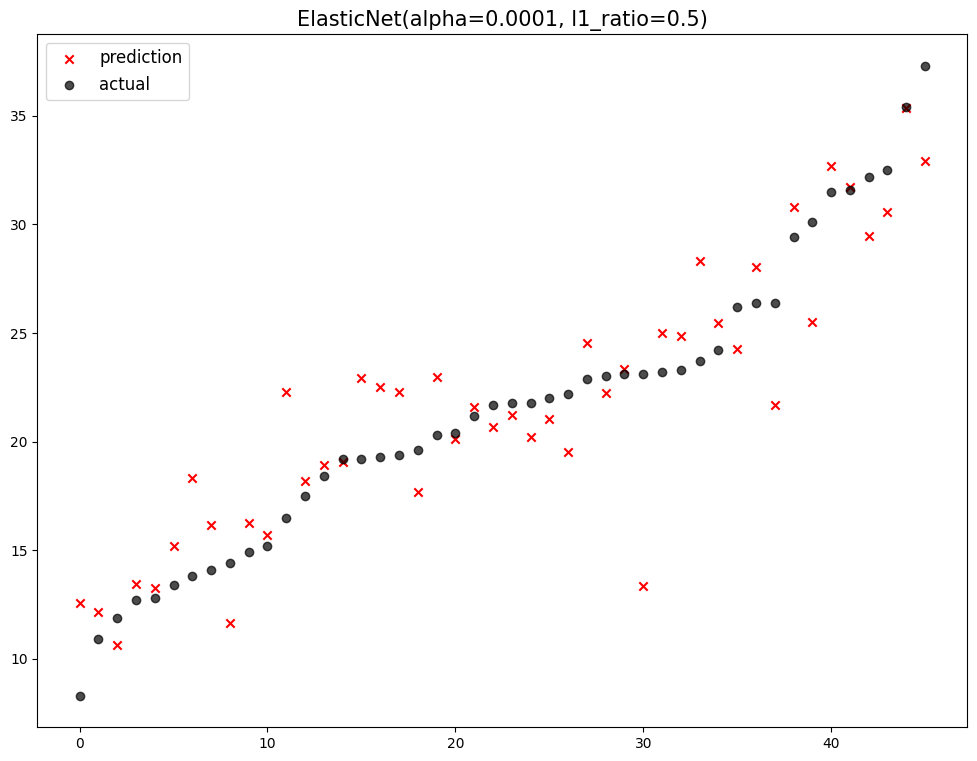


                                     model      rmse
0                         LinearRegression  2.782956
1                    Ridge(alpha = 0.0001)  2.782965
2                     Ridge(alpha = 0.001)  2.783047
3                      Ridge(alpha = 0.01)  2.783862
4   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
5                       Ridge(alpha = 0.1)  2.791931
6   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
7                    Lasso(alpha = 0.0001)  2.803865
8    ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
9                         Ridge(alpha = 1)  2.862449
10   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
11   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
12                    Lasso(alpha = 0.001)  3.005180
13    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
14                       Ridge(alpha = 10)  3.268830
15    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
16    ElasticNet(alpha=0.01, l1_ratio=0.8)  3.398561
17                     Lasso(alpha = 0.01)  3

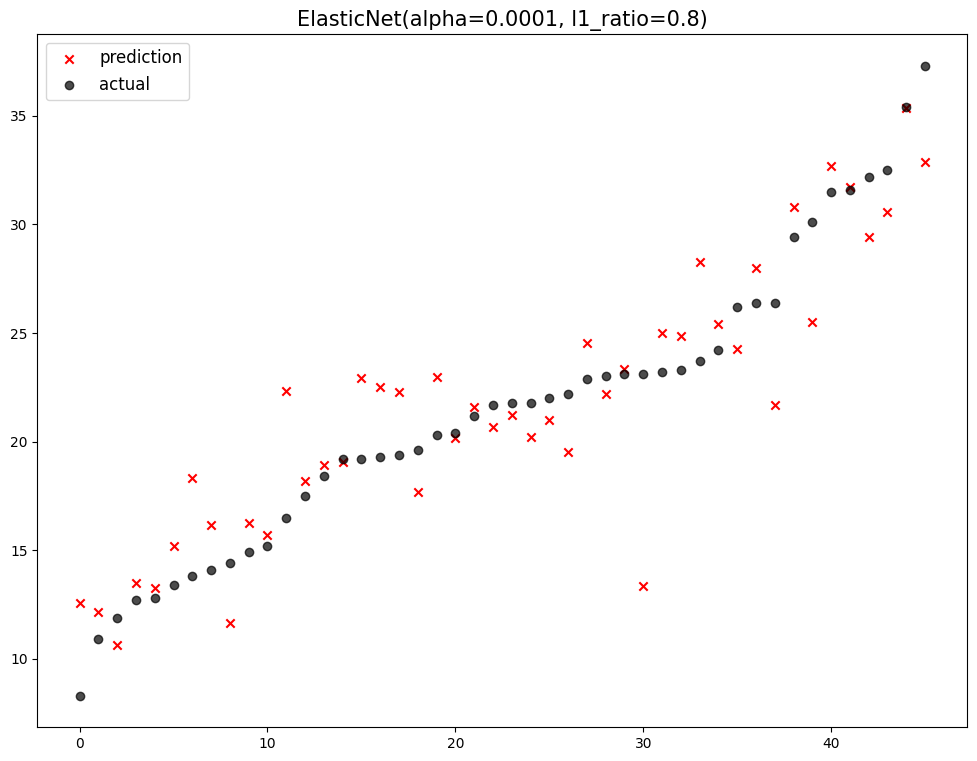


                                     model      rmse
0                         LinearRegression  2.782956
1                    Ridge(alpha = 0.0001)  2.782965
2                     Ridge(alpha = 0.001)  2.783047
3                      Ridge(alpha = 0.01)  2.783862
4   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
5                       Ridge(alpha = 0.1)  2.791931
6   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
7   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
8                    Lasso(alpha = 0.0001)  2.803865
9    ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
10                        Ridge(alpha = 1)  2.862449
11   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
12   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
13                    Lasso(alpha = 0.001)  3.005180
14    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
15                       Ridge(alpha = 10)  3.268830
16    ElasticNet(alpha=0.01, l1_ratio=0.5)  3.340404
17    ElasticNet(alpha=0.01, l1_ratio=0.8)  3

In [33]:
for alpha in alphas: # 규제 강도를 조정해 가면서..
    for ratio in ratios: # 규제 혼합 비율을 조정해 가면서..
        elasticnet = ElasticNet(alpha = alpha, l1_ratio = ratio) # 모델 객체 생성
        elasticnet.fit(scaled_X_train, scaled_y_train) # 학습
        pred = np.expm1(elasticnet.predict(scaled_X_valid)) # 예측
        rmse_eval('ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio), pred, y_valid) # 평가

### **5-6. 다항 회귀**

In [34]:
poly = PolynomialFeatures(degree = 2,include_bias = False) # 두 개의 기울기 사용, 절편 없음

In [35]:
poly_features = poly.fit_transform(scaled_X_train)

In [36]:
poly_features

array([[3.91256007e-04, 2.50000000e-01, 1.61290323e-01, ...,
        1.00000000e+00, 1.00992908e-01, 1.01995674e-02],
       [1.72013270e-03, 0.00000000e+00, 2.36436950e-01, ...,
        9.87664425e-01, 1.60983621e-01, 2.62394045e-02],
       [3.76273408e-03, 0.00000000e+00, 2.53665689e-01, ...,
        1.00000000e+00, 1.24539007e-01, 1.55099643e-02],
       ...,
       [1.68788358e-01, 0.00000000e+00, 6.46627566e-01, ...,
        7.73978778e-01, 5.78520612e-01, 4.32422836e-01],
       [7.43172858e-04, 6.00000000e-01, 4.50879765e-02, ...,
        9.76958660e-01, 1.69922777e-01, 2.95547306e-02],
       [5.21588879e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.90491177e-01, 2.65830579e-01, 7.93560887e-02]])

#### **a) LinearRegression**

In [37]:
### 모델 생성

poly_linear = make_pipeline(
    PolynomialFeatures(degree = 2,include_bias = False),
    LinearRegression(n_jobs = -1)
)

In [38]:
### 모델 학습 & 예측

poly_lin_pred = poly_linear.fit(scaled_X_train, scaled_y_train).predict(scaled_X_valid)
poly_lin_pred = np.expm1(poly_lin_pred)

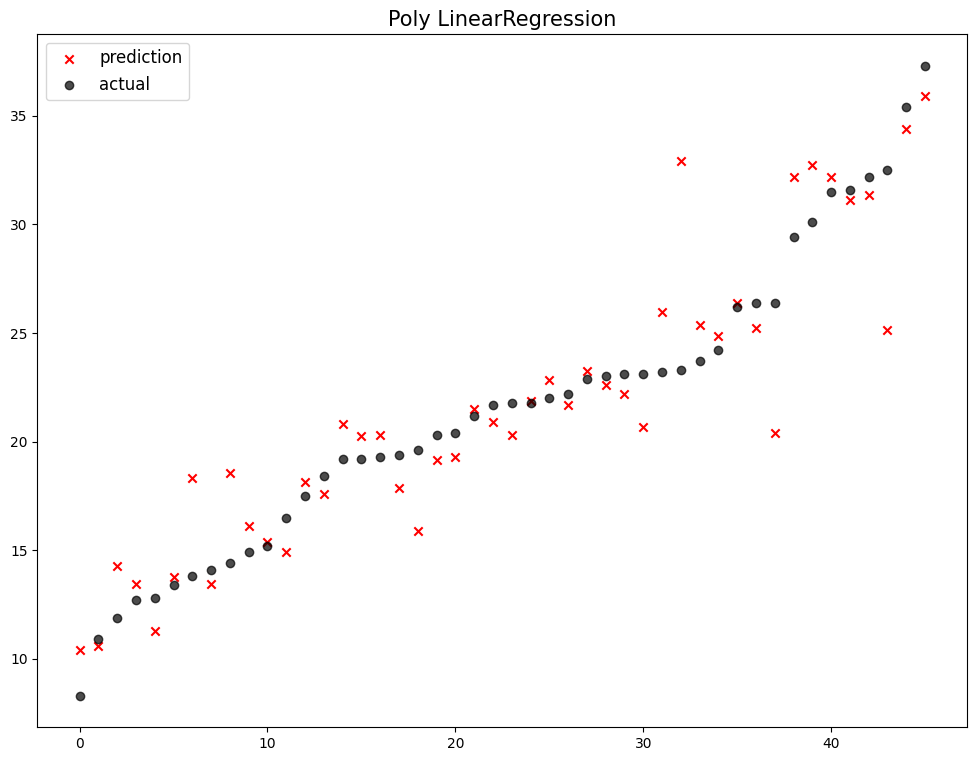


                                     model      rmse
0                    Poly LinearRegression  2.574577
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782965
3                     Ridge(alpha = 0.001)  2.783047
4                      Ridge(alpha = 0.01)  2.783862
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
6                       Ridge(alpha = 0.1)  2.791931
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
9                    Lasso(alpha = 0.0001)  2.803865
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
11                        Ridge(alpha = 1)  2.862449
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
14                    Lasso(alpha = 0.001)  3.005180
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
16                       Ridge(alpha = 10)  3.268830
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

In [39]:
### 평가 & 시각화

rmse_eval('Poly LinearRegression',poly_lin_pred,y_valid)

#### **b) Lasso**

In [40]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

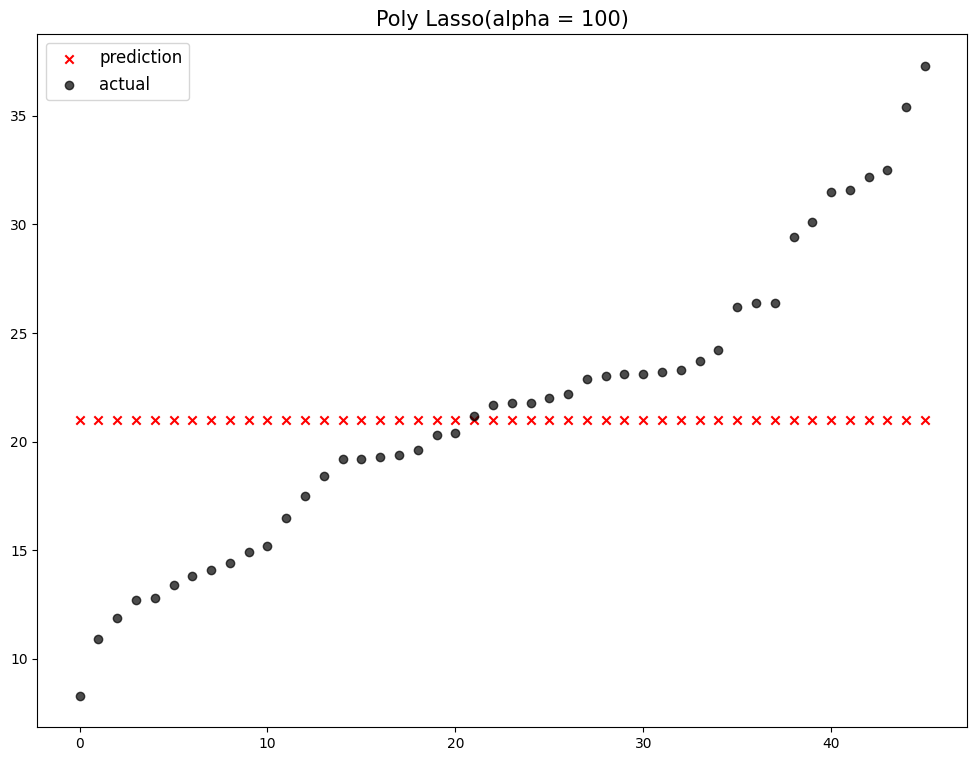


                                     model      rmse
0                    Poly LinearRegression  2.574577
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782965
3                     Ridge(alpha = 0.001)  2.783047
4                      Ridge(alpha = 0.01)  2.783862
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
6                       Ridge(alpha = 0.1)  2.791931
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
9                    Lasso(alpha = 0.0001)  2.803865
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
11                        Ridge(alpha = 1)  2.862449
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
14                    Lasso(alpha = 0.001)  3.005180
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
16                       Ridge(alpha = 10)  3.268830
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

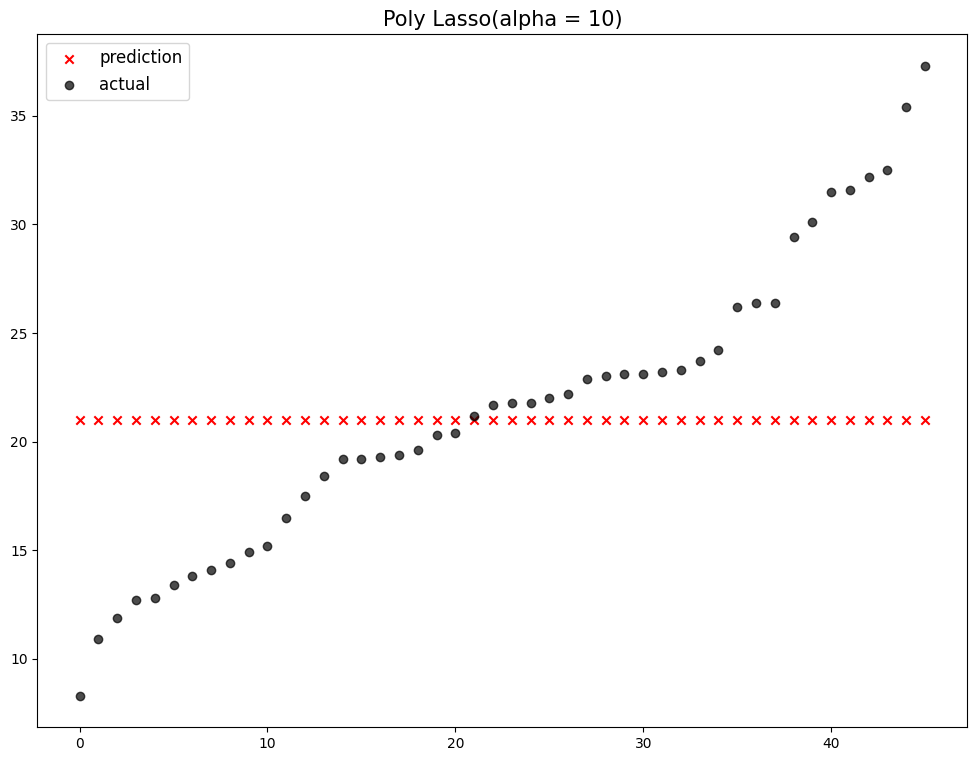


                                     model      rmse
0                    Poly LinearRegression  2.574577
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782965
3                     Ridge(alpha = 0.001)  2.783047
4                      Ridge(alpha = 0.01)  2.783862
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
6                       Ridge(alpha = 0.1)  2.791931
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
9                    Lasso(alpha = 0.0001)  2.803865
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
11                        Ridge(alpha = 1)  2.862449
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
14                    Lasso(alpha = 0.001)  3.005180
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
16                       Ridge(alpha = 10)  3.268830
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

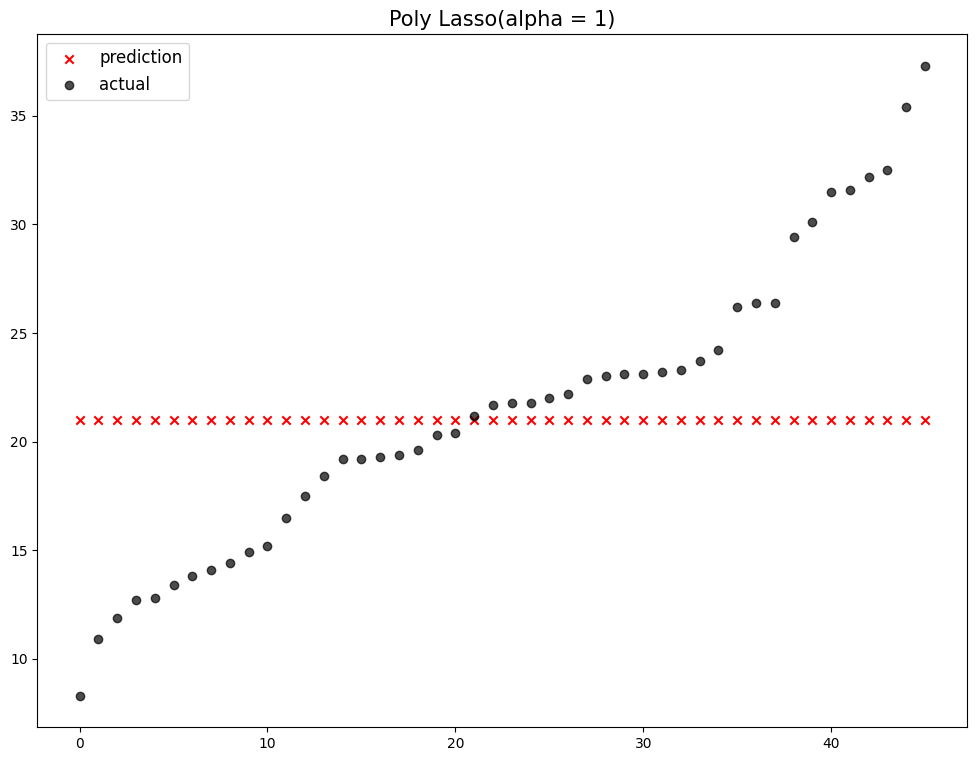


                                     model      rmse
0                    Poly LinearRegression  2.574577
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782965
3                     Ridge(alpha = 0.001)  2.783047
4                      Ridge(alpha = 0.01)  2.783862
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
6                       Ridge(alpha = 0.1)  2.791931
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
9                    Lasso(alpha = 0.0001)  2.803865
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
11                        Ridge(alpha = 1)  2.862449
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
14                    Lasso(alpha = 0.001)  3.005180
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
16                       Ridge(alpha = 10)  3.268830
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

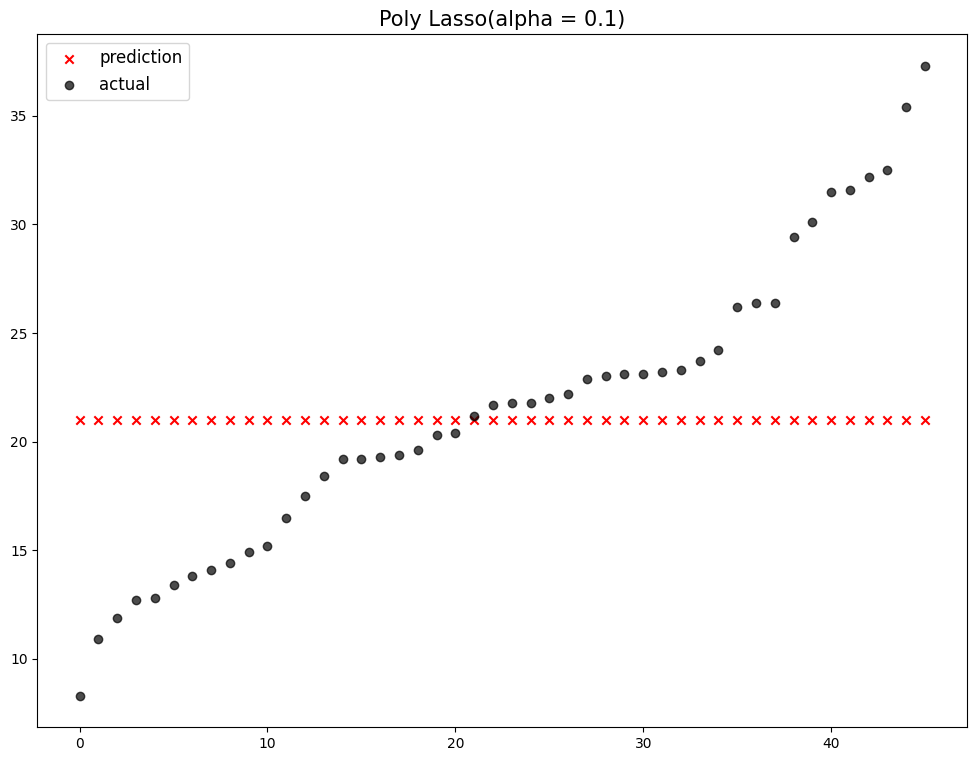


                                     model      rmse
0                    Poly LinearRegression  2.574577
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782965
3                     Ridge(alpha = 0.001)  2.783047
4                      Ridge(alpha = 0.01)  2.783862
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
6                       Ridge(alpha = 0.1)  2.791931
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
9                    Lasso(alpha = 0.0001)  2.803865
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
11                        Ridge(alpha = 1)  2.862449
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
14                    Lasso(alpha = 0.001)  3.005180
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
16                       Ridge(alpha = 10)  3.268830
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

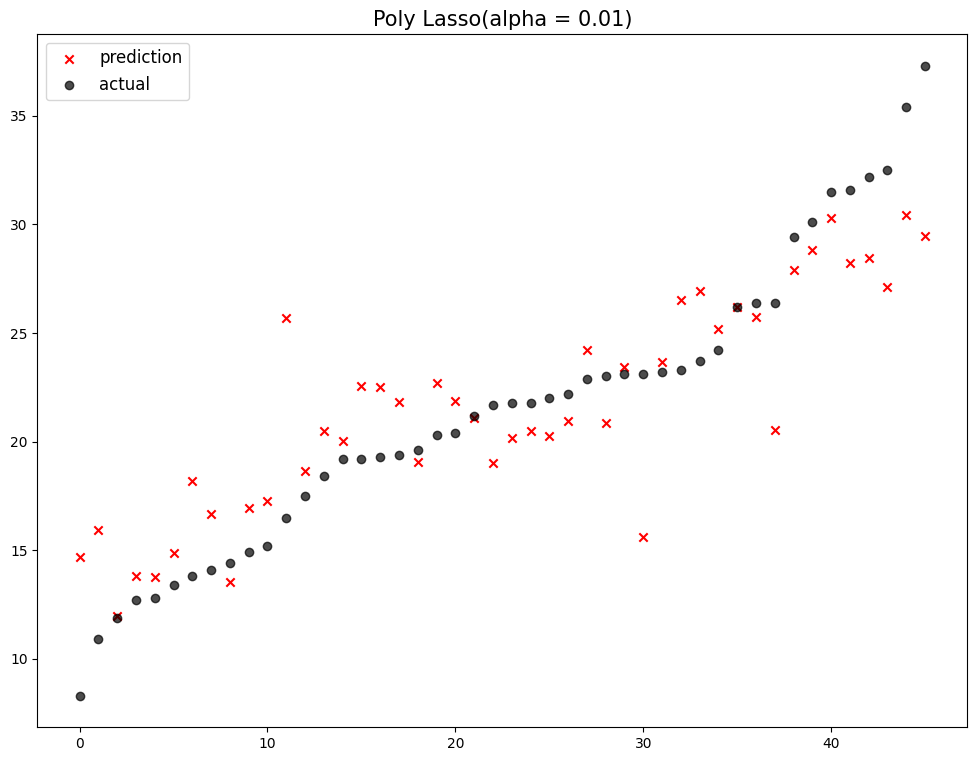


                                     model      rmse
0                    Poly LinearRegression  2.574577
1                         LinearRegression  2.782956
2                    Ridge(alpha = 0.0001)  2.782965
3                     Ridge(alpha = 0.001)  2.783047
4                      Ridge(alpha = 0.01)  2.783862
5   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
6                       Ridge(alpha = 0.1)  2.791931
7   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
8   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
9                    Lasso(alpha = 0.0001)  2.803865
10   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
11                        Ridge(alpha = 1)  2.862449
12   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
13   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
14                    Lasso(alpha = 0.001)  3.005180
15    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
16                       Ridge(alpha = 10)  3.268830
17    ElasticNet(alpha=0.01, l1_ratio=0.5)  3

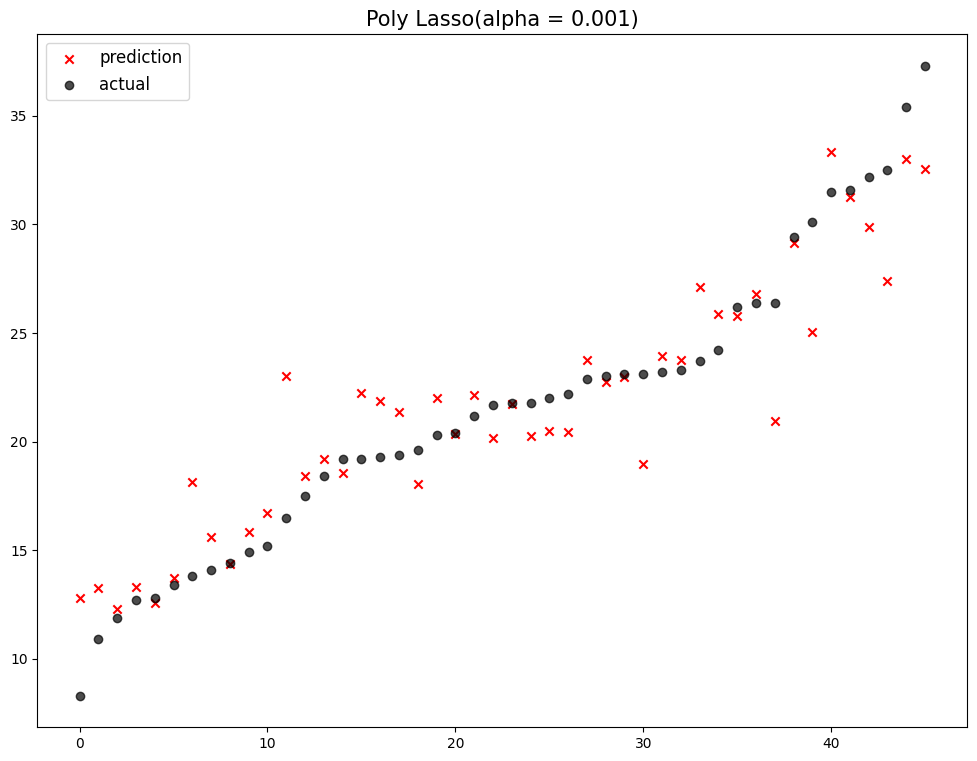


                                     model      rmse
0                Poly Lasso(alpha = 0.001)  2.480847
1                    Poly LinearRegression  2.574577
2                         LinearRegression  2.782956
3                    Ridge(alpha = 0.0001)  2.782965
4                     Ridge(alpha = 0.001)  2.783047
5                      Ridge(alpha = 0.01)  2.783862
6   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
7                       Ridge(alpha = 0.1)  2.791931
8   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
9   ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
10                   Lasso(alpha = 0.0001)  2.803865
11   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
12                        Ridge(alpha = 1)  2.862449
13   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
14   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
15                    Lasso(alpha = 0.001)  3.005180
16    ElasticNet(alpha=0.01, l1_ratio=0.2)  3.237470
17                       Ridge(alpha = 10)  3

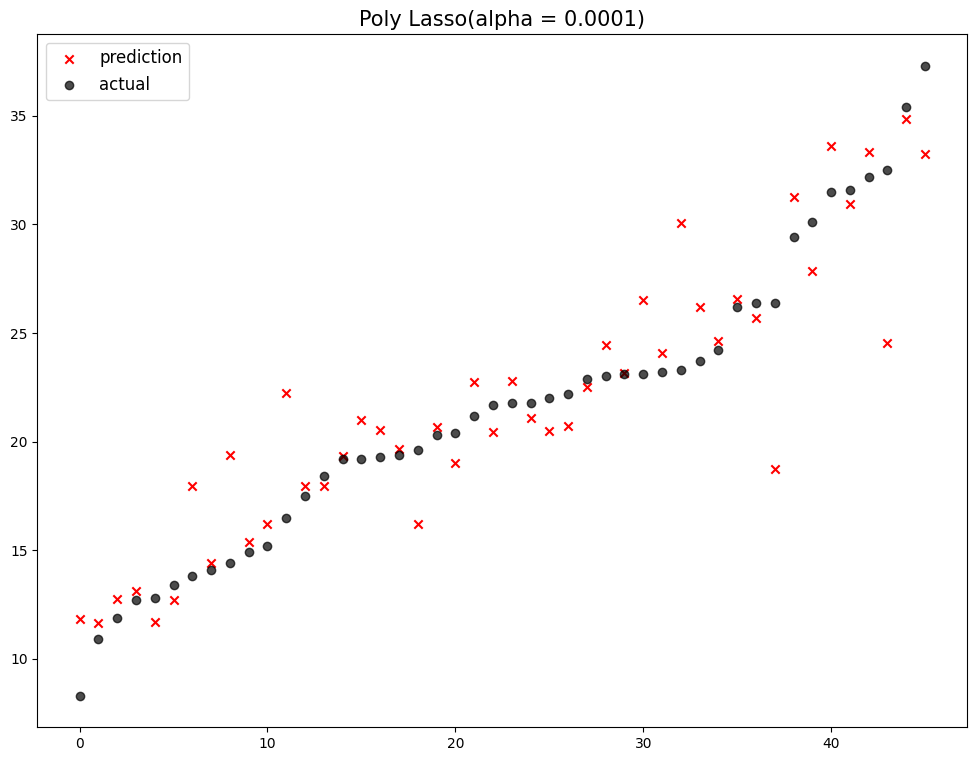


                                     model      rmse
0                Poly Lasso(alpha = 0.001)  2.480847
1                    Poly LinearRegression  2.574577
2               Poly Lasso(alpha = 0.0001)  2.724416
3                         LinearRegression  2.782956
4                    Ridge(alpha = 0.0001)  2.782965
5                     Ridge(alpha = 0.001)  2.783047
6                      Ridge(alpha = 0.01)  2.783862
7   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
8                       Ridge(alpha = 0.1)  2.791931
9   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
10  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
11                   Lasso(alpha = 0.0001)  2.803865
12   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
13                        Ridge(alpha = 1)  2.862449
14   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
15   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
16                    Lasso(alpha = 0.001)  3.005180
17    ElasticNet(alpha=0.01, l1_ratio=0.2)  3

In [41]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    # 모델 객체 생성
    poly_lasso = make_pipeline(
        PolynomialFeatures(degree = 2,include_bias = False),
        Lasso(alpha = alpha)
    )
    poly_lasso.fit(scaled_X_train, scaled_y_train) # 학습
    poly_lasso_pred = np.expm1(poly_lasso.predict(scaled_X_valid)) # 예측
    rmse_eval('Poly Lasso(alpha = {})'.format(alpha),poly_lasso_pred,y_valid) # 평가 & 시각화

#### **c) Ridge**

In [42]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정

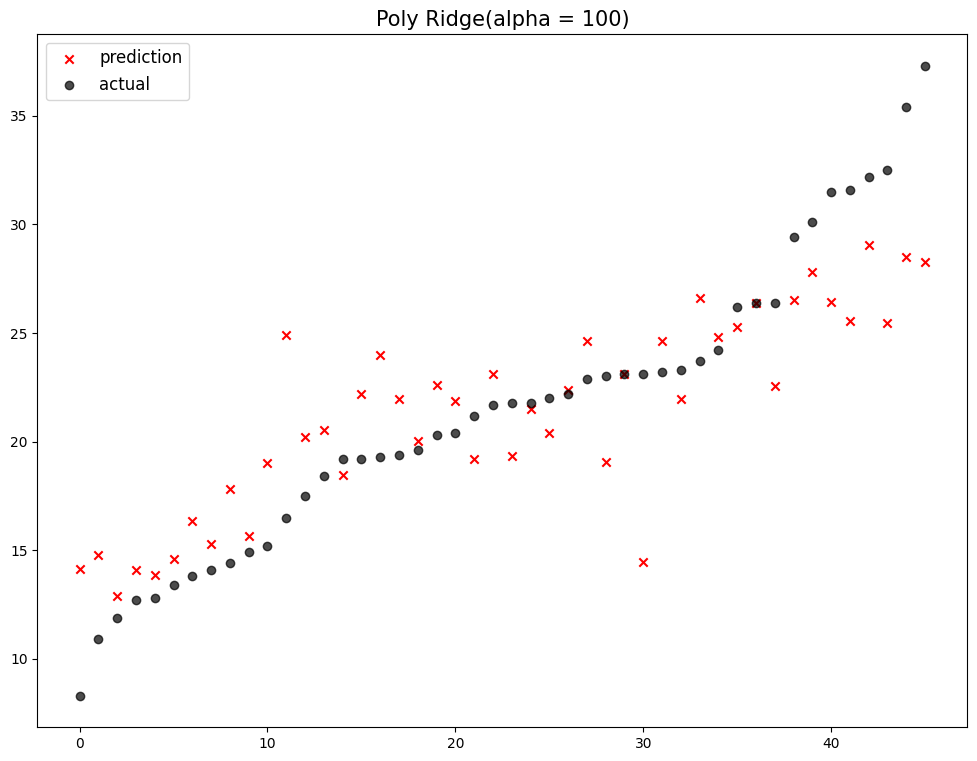


                                     model      rmse
0                Poly Lasso(alpha = 0.001)  2.480847
1                    Poly LinearRegression  2.574577
2               Poly Lasso(alpha = 0.0001)  2.724416
3                         LinearRegression  2.782956
4                    Ridge(alpha = 0.0001)  2.782965
5                     Ridge(alpha = 0.001)  2.783047
6                      Ridge(alpha = 0.01)  2.783862
7   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
8                       Ridge(alpha = 0.1)  2.791931
9   ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
10  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
11                   Lasso(alpha = 0.0001)  2.803865
12   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
13                        Ridge(alpha = 1)  2.862449
14   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
15   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
16                    Lasso(alpha = 0.001)  3.005180
17    ElasticNet(alpha=0.01, l1_ratio=0.2)  3

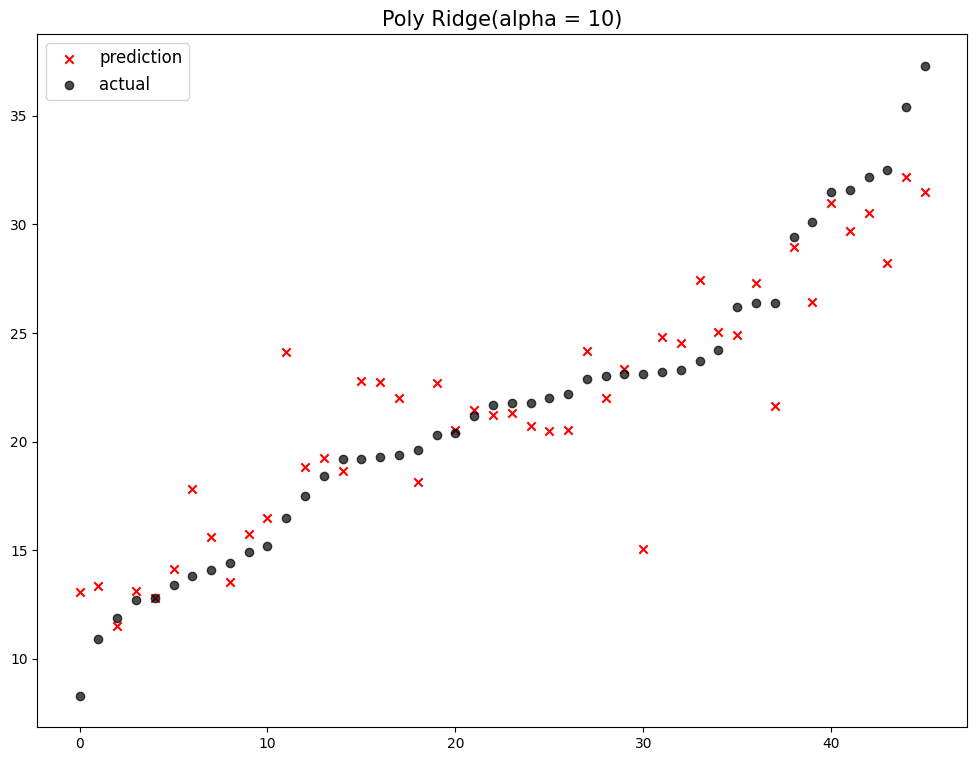


                                     model      rmse
0                Poly Lasso(alpha = 0.001)  2.480847
1                    Poly LinearRegression  2.574577
2               Poly Lasso(alpha = 0.0001)  2.724416
3                   Poly Ridge(alpha = 10)  2.766952
4                         LinearRegression  2.782956
5                    Ridge(alpha = 0.0001)  2.782965
6                     Ridge(alpha = 0.001)  2.783047
7                      Ridge(alpha = 0.01)  2.783862
8   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
9                       Ridge(alpha = 0.1)  2.791931
10  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
11  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
12                   Lasso(alpha = 0.0001)  2.803865
13   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
14                        Ridge(alpha = 1)  2.862449
15   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
16   ElasticNet(alpha=0.001, l1_ratio=0.8)  2.963154
17                    Lasso(alpha = 0.001)  3

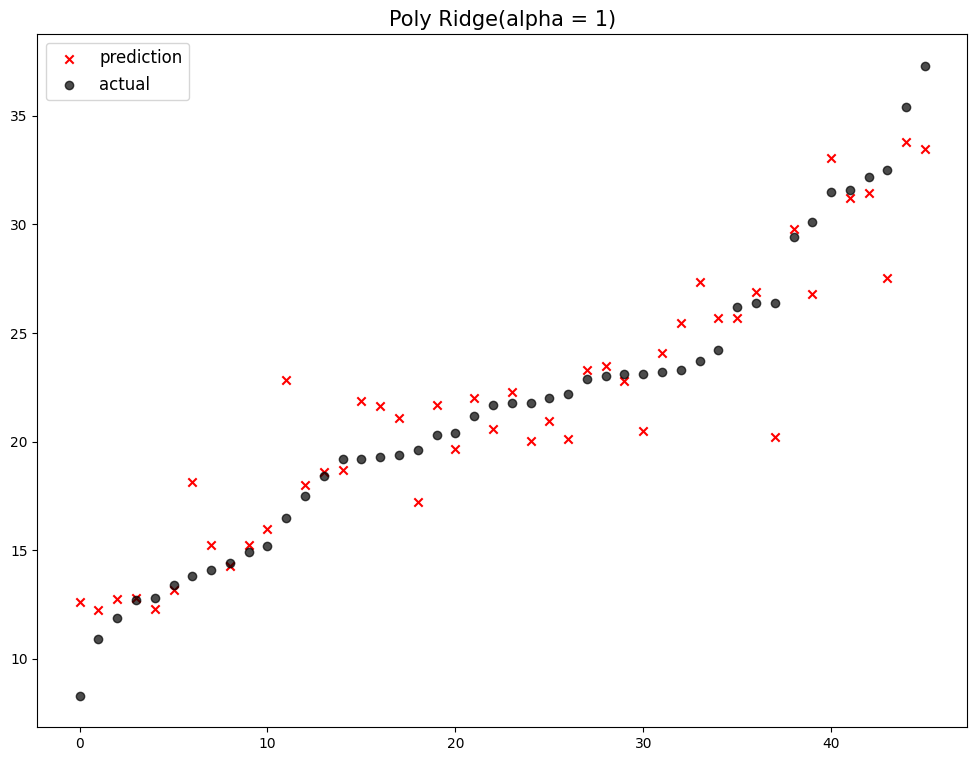


                                     model      rmse
0                    Poly Ridge(alpha = 1)  2.285858
1                Poly Lasso(alpha = 0.001)  2.480847
2                    Poly LinearRegression  2.574577
3               Poly Lasso(alpha = 0.0001)  2.724416
4                   Poly Ridge(alpha = 10)  2.766952
5                         LinearRegression  2.782956
6                    Ridge(alpha = 0.0001)  2.782965
7                     Ridge(alpha = 0.001)  2.783047
8                      Ridge(alpha = 0.01)  2.783862
9   ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
10                      Ridge(alpha = 0.1)  2.791931
11  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
12  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
13                   Lasso(alpha = 0.0001)  2.803865
14   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
15                        Ridge(alpha = 1)  2.862449
16   ElasticNet(alpha=0.001, l1_ratio=0.5)  2.907421
17   ElasticNet(alpha=0.001, l1_ratio=0.8)  2

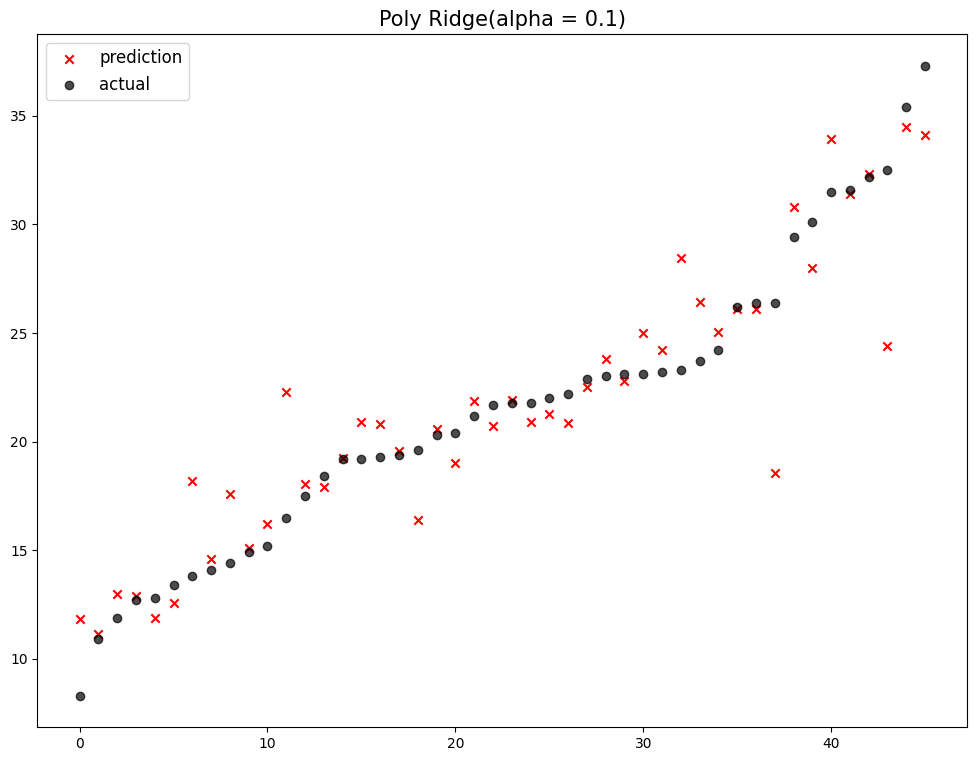


                                     model      rmse
0                    Poly Ridge(alpha = 1)  2.285858
1                Poly Lasso(alpha = 0.001)  2.480847
2                  Poly Ridge(alpha = 0.1)  2.524740
3                    Poly LinearRegression  2.574577
4               Poly Lasso(alpha = 0.0001)  2.724416
5                   Poly Ridge(alpha = 10)  2.766952
6                         LinearRegression  2.782956
7                    Ridge(alpha = 0.0001)  2.782965
8                     Ridge(alpha = 0.001)  2.783047
9                      Ridge(alpha = 0.01)  2.783862
10  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
11                      Ridge(alpha = 0.1)  2.791931
12  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
13  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
14                   Lasso(alpha = 0.0001)  2.803865
15   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
16                        Ridge(alpha = 1)  2.862449
17   ElasticNet(alpha=0.001, l1_ratio=0.5)  2

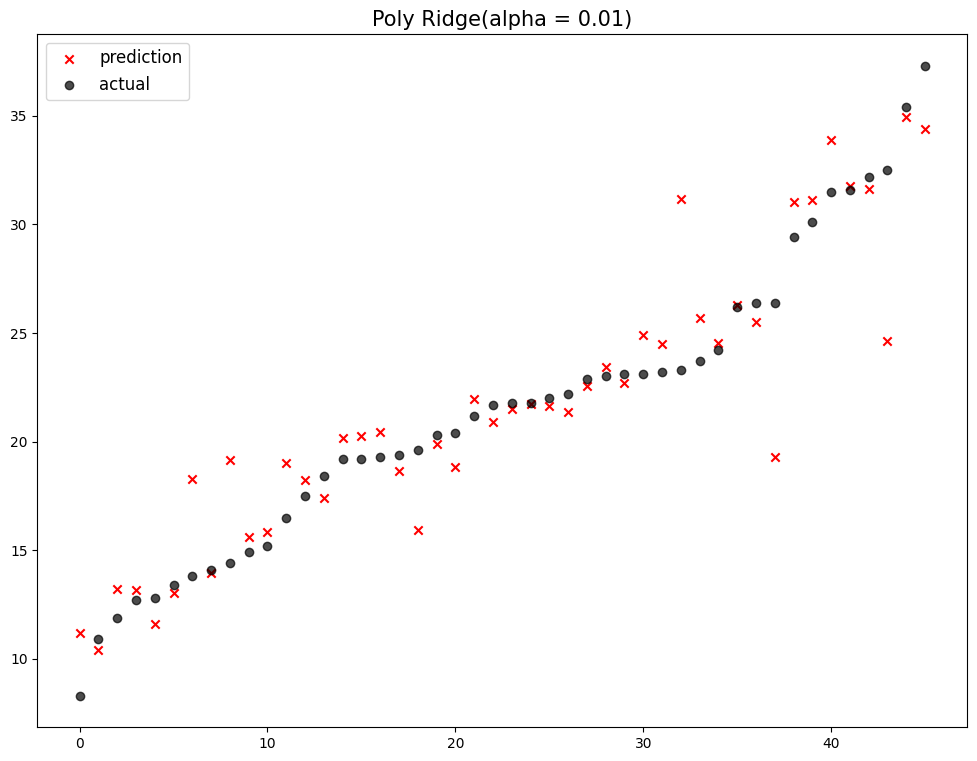


                                     model      rmse
0                    Poly Ridge(alpha = 1)  2.285858
1                Poly Lasso(alpha = 0.001)  2.480847
2                 Poly Ridge(alpha = 0.01)  2.504467
3                  Poly Ridge(alpha = 0.1)  2.524740
4                    Poly LinearRegression  2.574577
5               Poly Lasso(alpha = 0.0001)  2.724416
6                   Poly Ridge(alpha = 10)  2.766952
7                         LinearRegression  2.782956
8                    Ridge(alpha = 0.0001)  2.782965
9                     Ridge(alpha = 0.001)  2.783047
10                     Ridge(alpha = 0.01)  2.783862
11  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
12                      Ridge(alpha = 0.1)  2.791931
13  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
14  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
15                   Lasso(alpha = 0.0001)  2.803865
16   ElasticNet(alpha=0.001, l1_ratio=0.2)  2.855841
17                        Ridge(alpha = 1)  2

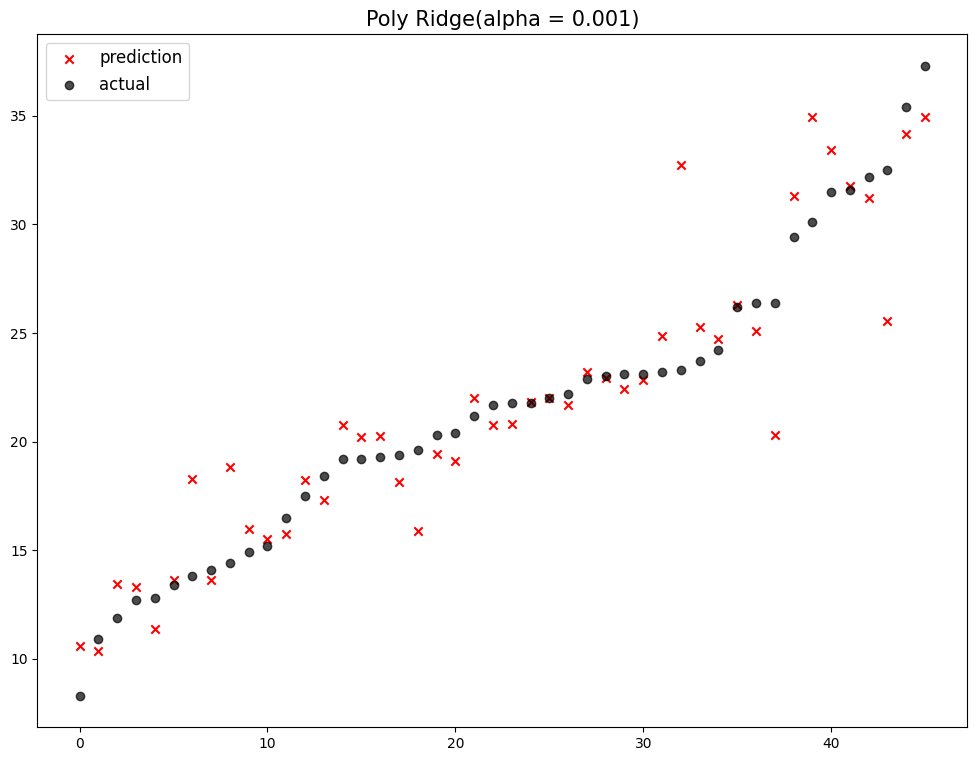


                                     model      rmse
0                    Poly Ridge(alpha = 1)  2.285858
1                Poly Lasso(alpha = 0.001)  2.480847
2                 Poly Ridge(alpha = 0.01)  2.504467
3                  Poly Ridge(alpha = 0.1)  2.524740
4                Poly Ridge(alpha = 0.001)  2.554142
5                    Poly LinearRegression  2.574577
6               Poly Lasso(alpha = 0.0001)  2.724416
7                   Poly Ridge(alpha = 10)  2.766952
8                         LinearRegression  2.782956
9                    Ridge(alpha = 0.0001)  2.782965
10                    Ridge(alpha = 0.001)  2.783047
11                     Ridge(alpha = 0.01)  2.783862
12  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
13                      Ridge(alpha = 0.1)  2.791931
14  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
15  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
16                   Lasso(alpha = 0.0001)  2.803865
17   ElasticNet(alpha=0.001, l1_ratio=0.2)  2

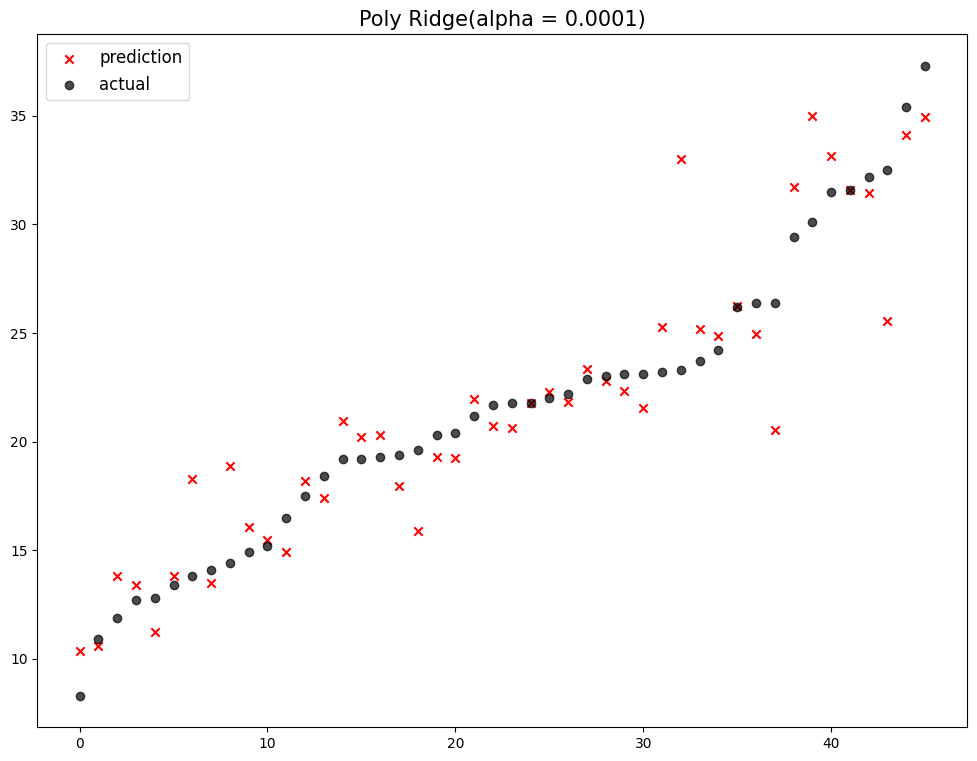


                                     model      rmse
0                    Poly Ridge(alpha = 1)  2.285858
1                Poly Lasso(alpha = 0.001)  2.480847
2                 Poly Ridge(alpha = 0.01)  2.504467
3                  Poly Ridge(alpha = 0.1)  2.524740
4                Poly Ridge(alpha = 0.001)  2.554142
5                    Poly LinearRegression  2.574577
6               Poly Ridge(alpha = 0.0001)  2.603727
7               Poly Lasso(alpha = 0.0001)  2.724416
8                   Poly Ridge(alpha = 10)  2.766952
9                         LinearRegression  2.782956
10                   Ridge(alpha = 0.0001)  2.782965
11                    Ridge(alpha = 0.001)  2.783047
12                     Ridge(alpha = 0.01)  2.783862
13  ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                      Ridge(alpha = 0.1)  2.791931
15  ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16  ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17                   Lasso(alpha = 0.0001)  2

In [43]:
for alpha in alphas: # 규제 강도를 조절해 가면서..
    # 모델 객체 생성
    poly_ridge = make_pipeline(
        PolynomialFeatures(degree = 2,include_bias = False),
        Ridge(alpha = alpha)
    )
    poly_ridge.fit(scaled_X_train, scaled_y_train) # 학습
    poly_ridge_pred = np.expm1(poly_ridge.predict(scaled_X_valid)) # 예측
    rmse_eval('Poly Ridge(alpha = {})'.format(alpha),poly_ridge_pred,y_valid) # 평가 & 시각화

#### **d) ElasticNet**

In [44]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001] # 규제 강도 설정
ratios = [0.2,0.5,0.8] # l1 규제 혼합 비율

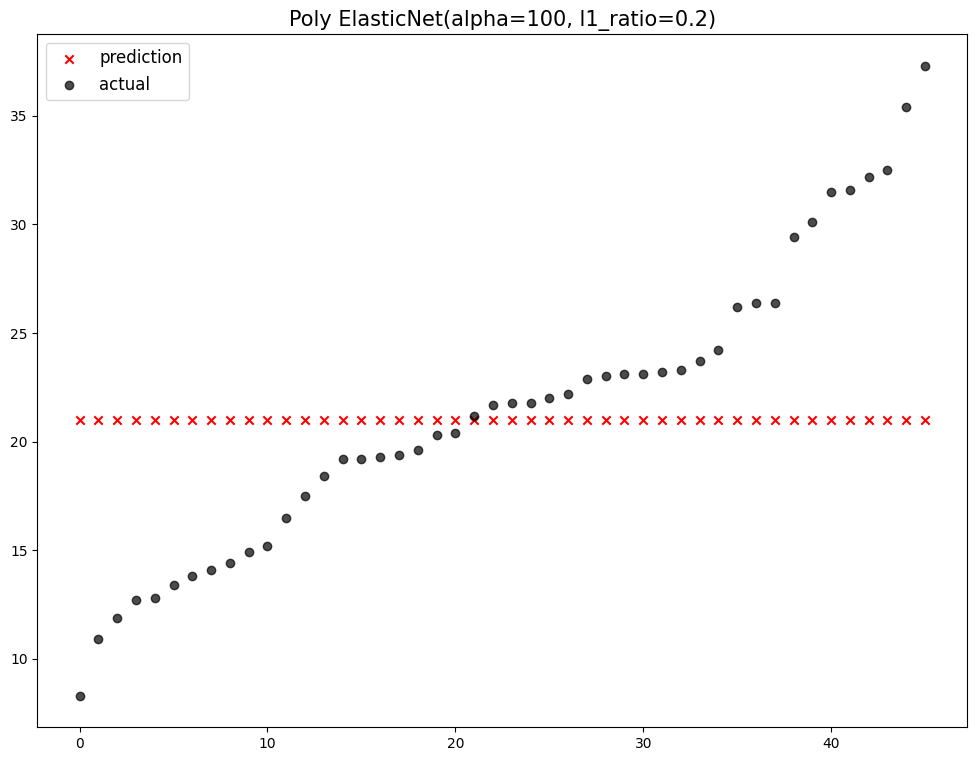


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

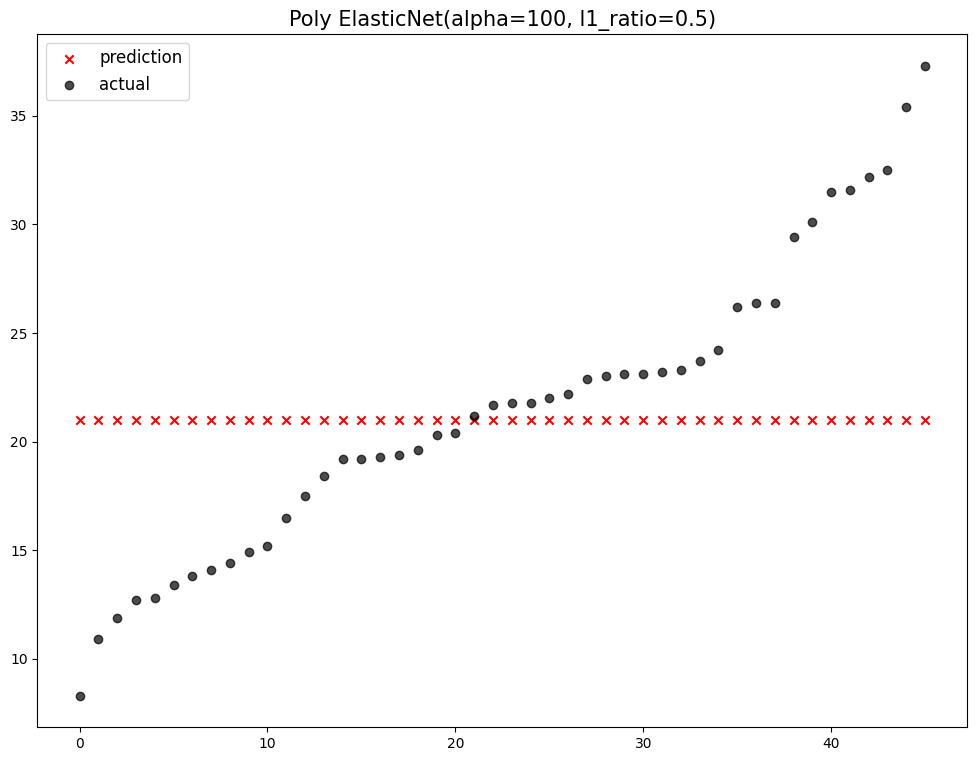


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

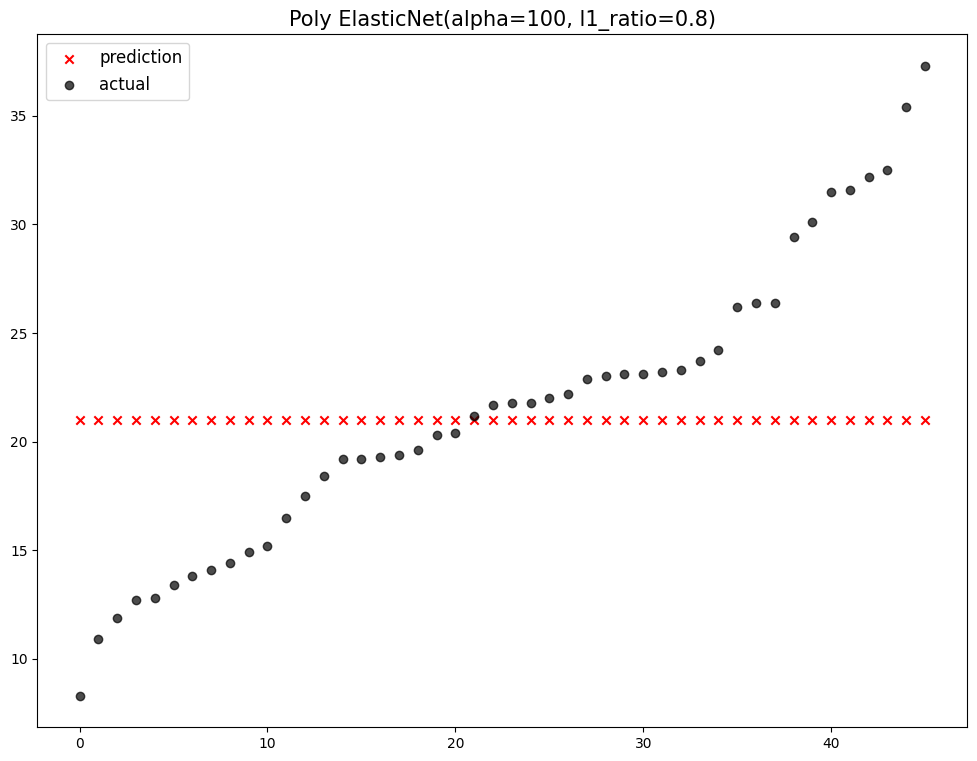


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

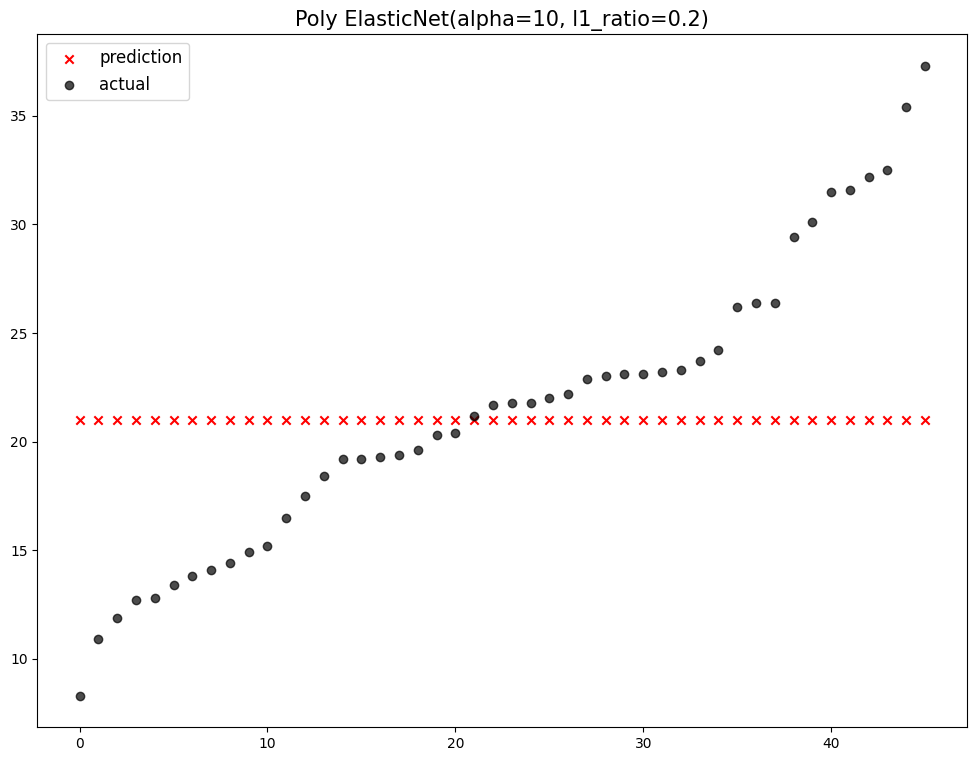


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

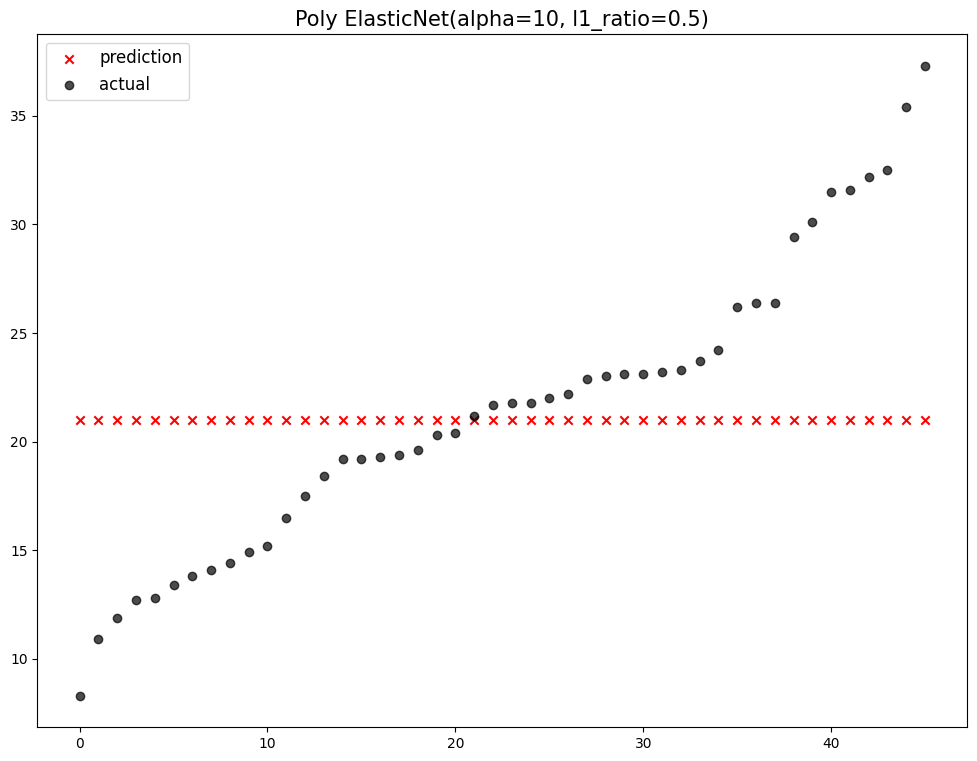


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

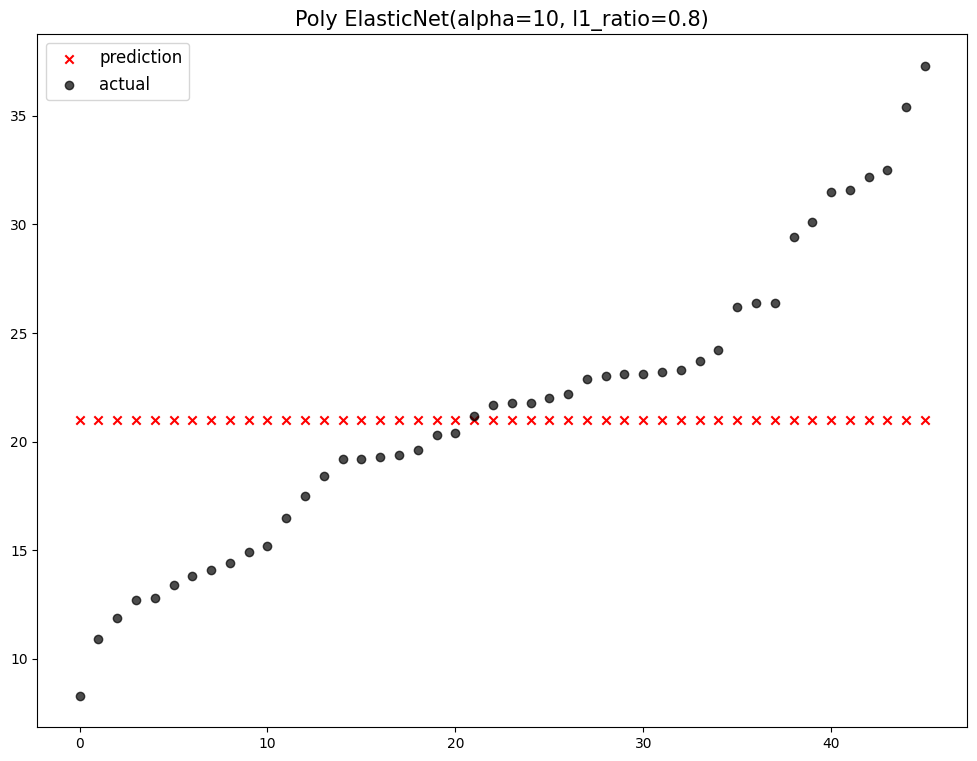


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

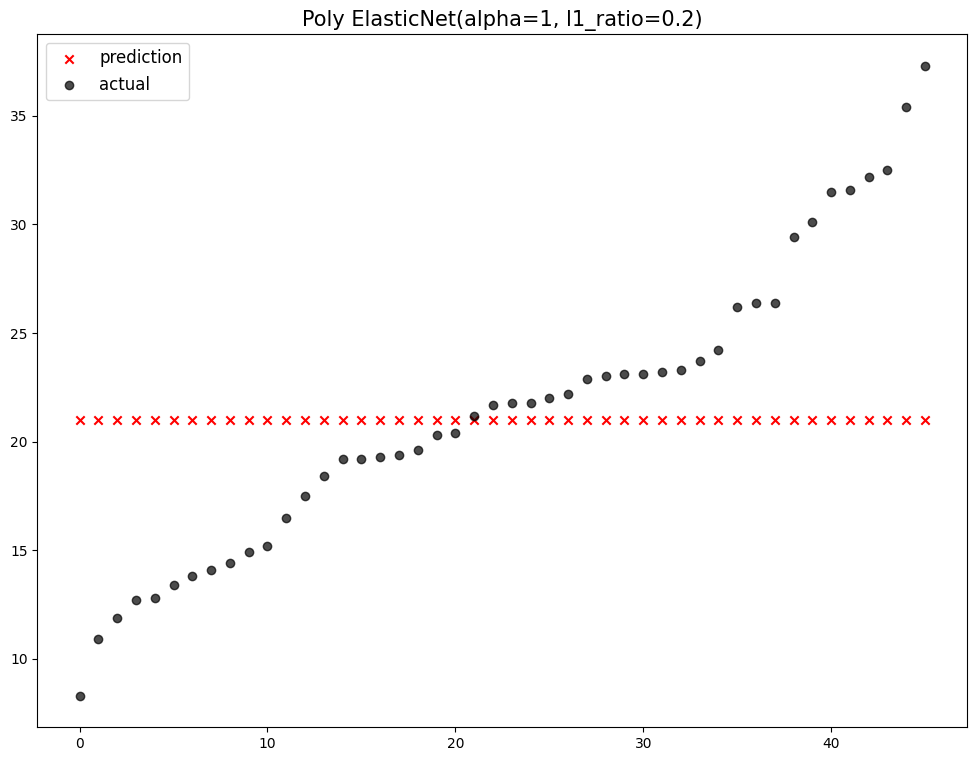


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

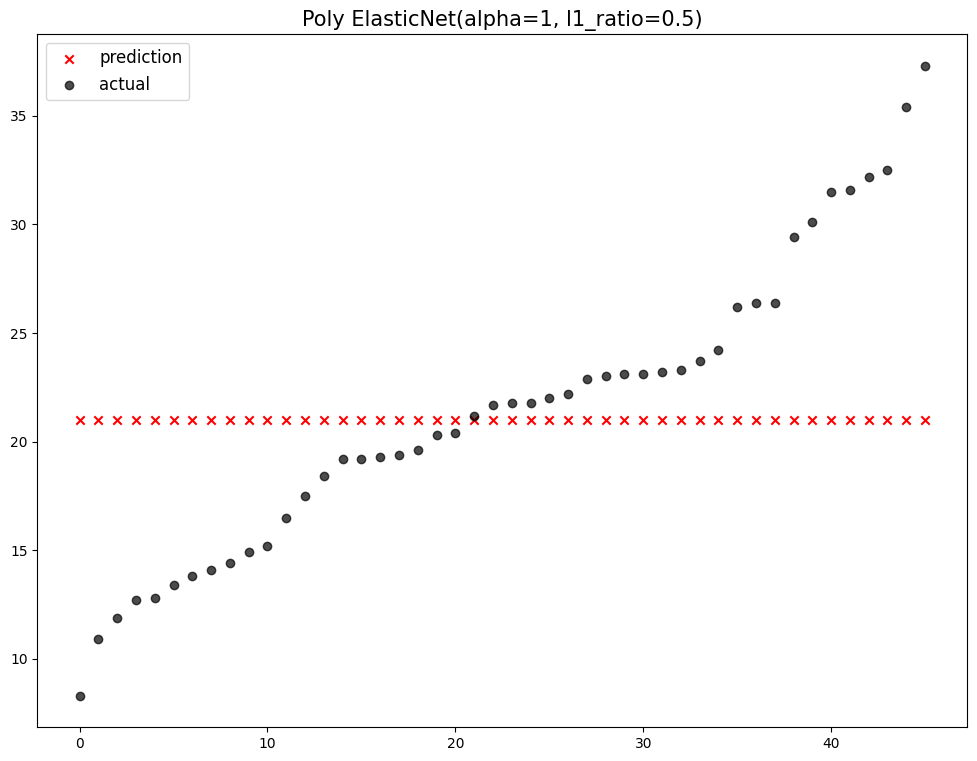


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

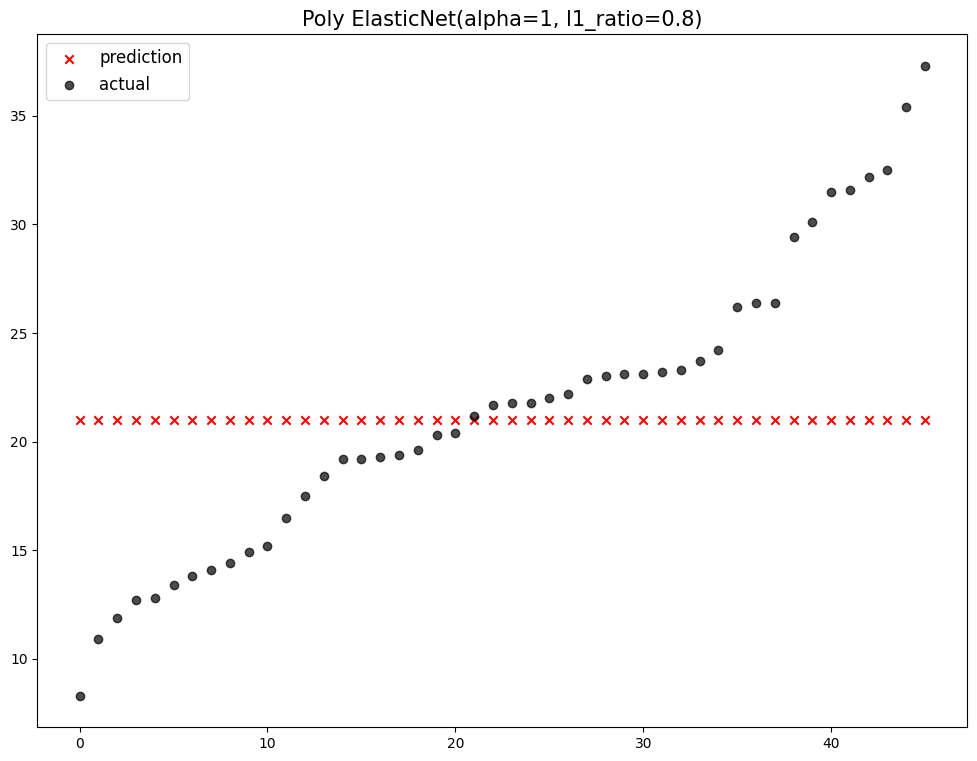


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
5                      Poly LinearRegression  2.574577
6                 Poly Ridge(alpha = 0.0001)  2.603727
7                 Poly Lasso(alpha = 0.0001)  2.724416
8                     Poly Ridge(alpha = 10)  2.766952
9                           LinearRegression  2.782956
10                     Ridge(alpha = 0.0001)  2.782965
11                      Ridge(alpha = 0.001)  2.783047
12                       Ridge(alpha = 0.01)  2.783862
13    ElasticNet(alpha=0.0001, l1_ratio=0.2)  2.789942
14                        Ridge(alpha = 0.1)  2.791931
15    ElasticNet(alpha=0.0001, l1_ratio=0.5)  2.795017
16    ElasticNet(alpha=0.0001, l1_ratio=0.8)  2.800260
17       

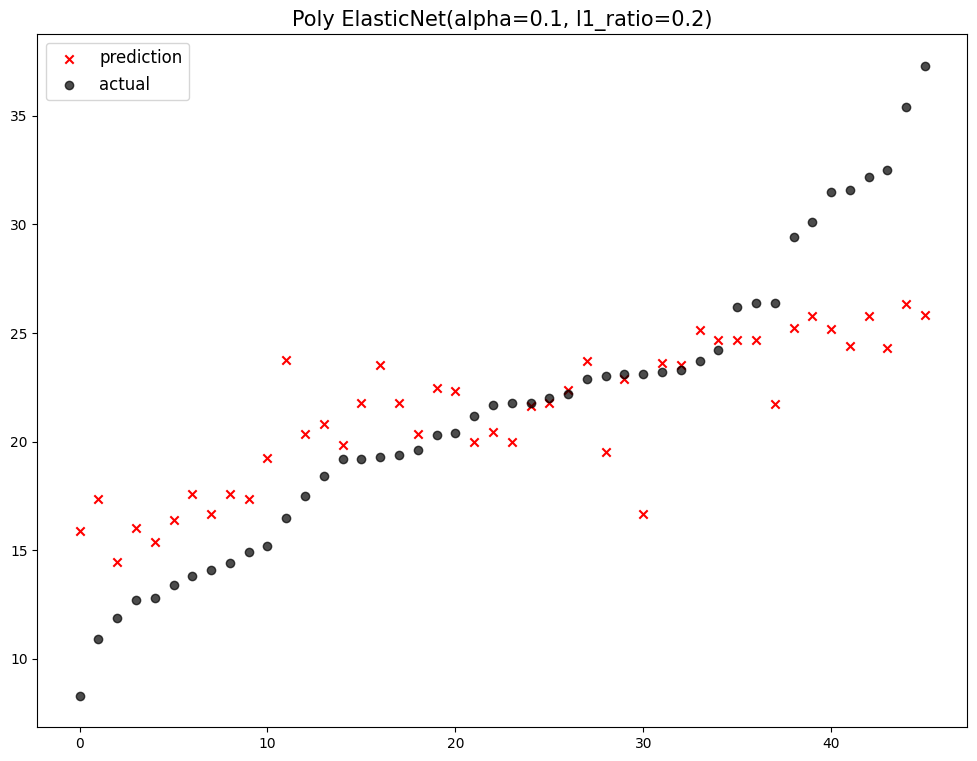


                                      model      rmse
0                     Poly Ridge(alpha = 1)  2.285858
1                 Poly Lasso(alpha = 0.001)  2.480847
2                  Poly Ridge(alpha = 0.01)  2.504467
3                   Poly Ridge(alpha = 0.1)  2.524740
4                 Poly Ridge(alpha = 0.001)  2.554142
..                                      ...       ...
56  Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
57  Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
58   Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
59   Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
60   Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[61 rows x 2 columns]


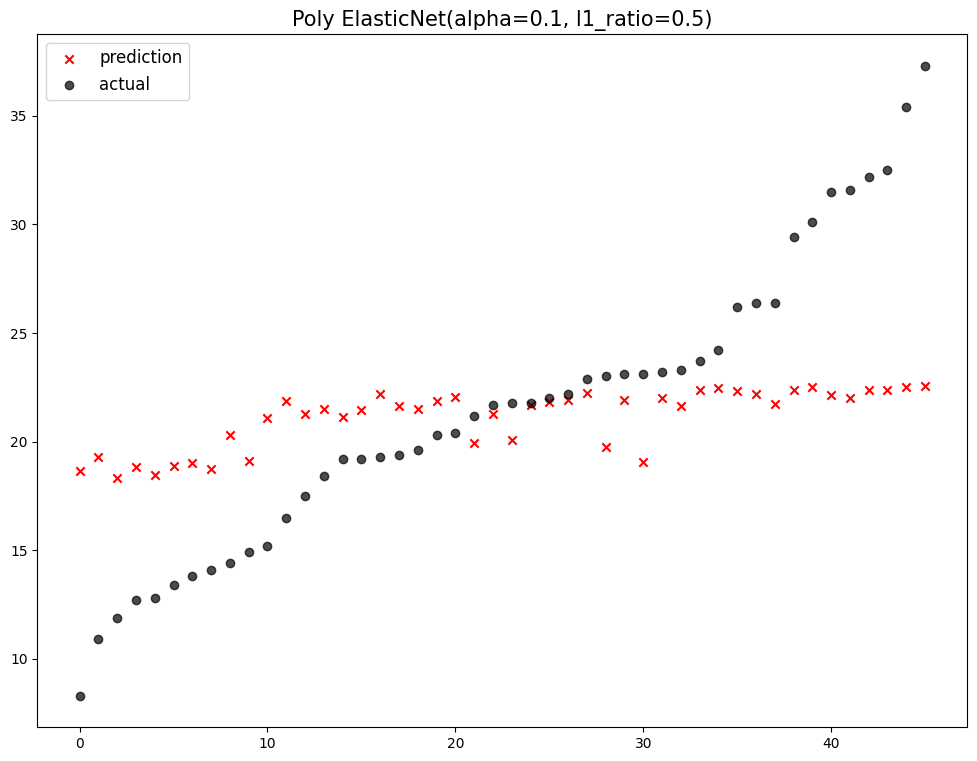


                                      model      rmse
0                     Poly Ridge(alpha = 1)  2.285858
1                 Poly Lasso(alpha = 0.001)  2.480847
2                  Poly Ridge(alpha = 0.01)  2.504467
3                   Poly Ridge(alpha = 0.1)  2.524740
4                 Poly Ridge(alpha = 0.001)  2.554142
..                                      ...       ...
57  Poly ElasticNet(alpha=10, l1_ratio=0.5)  6.673060
58  Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
59   Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
60   Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
61   Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060

[62 rows x 2 columns]


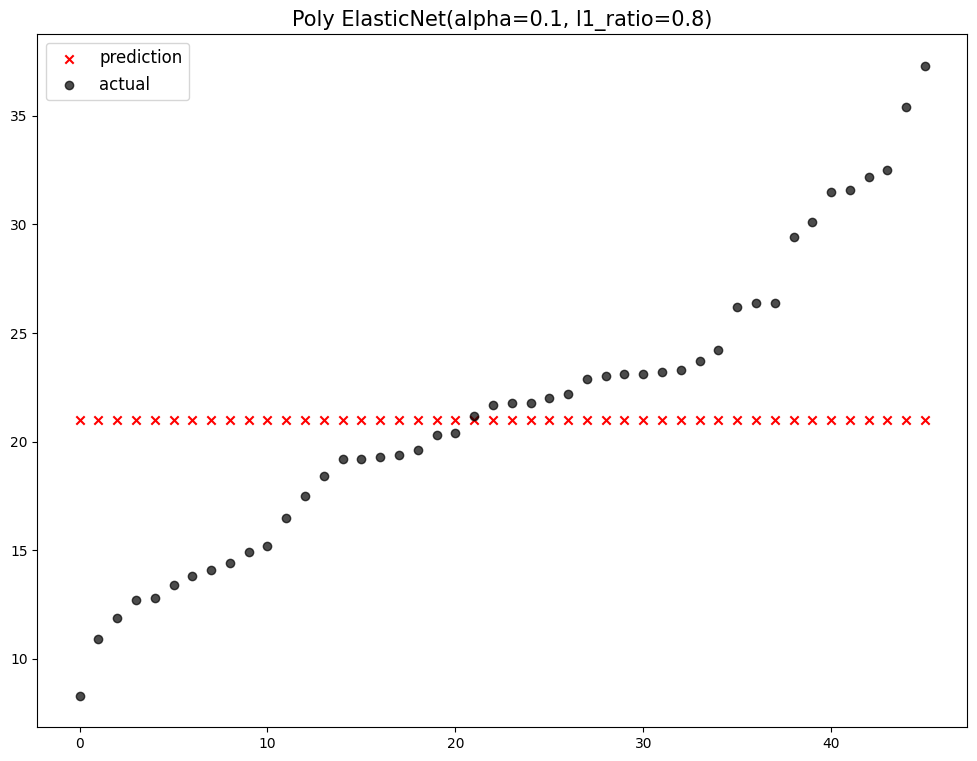


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
..                                       ...       ...
58   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
59    Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
60    Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
61    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
62  Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[63 rows x 2 columns]


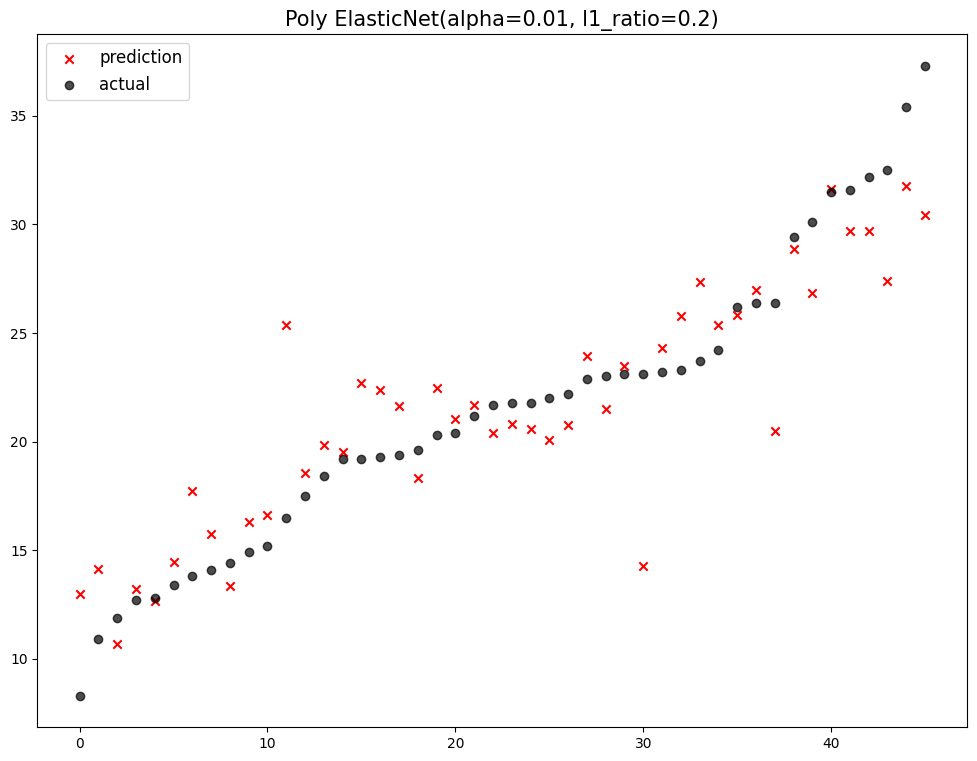


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
..                                       ...       ...
59   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
60    Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
61    Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
62    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
63  Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[64 rows x 2 columns]


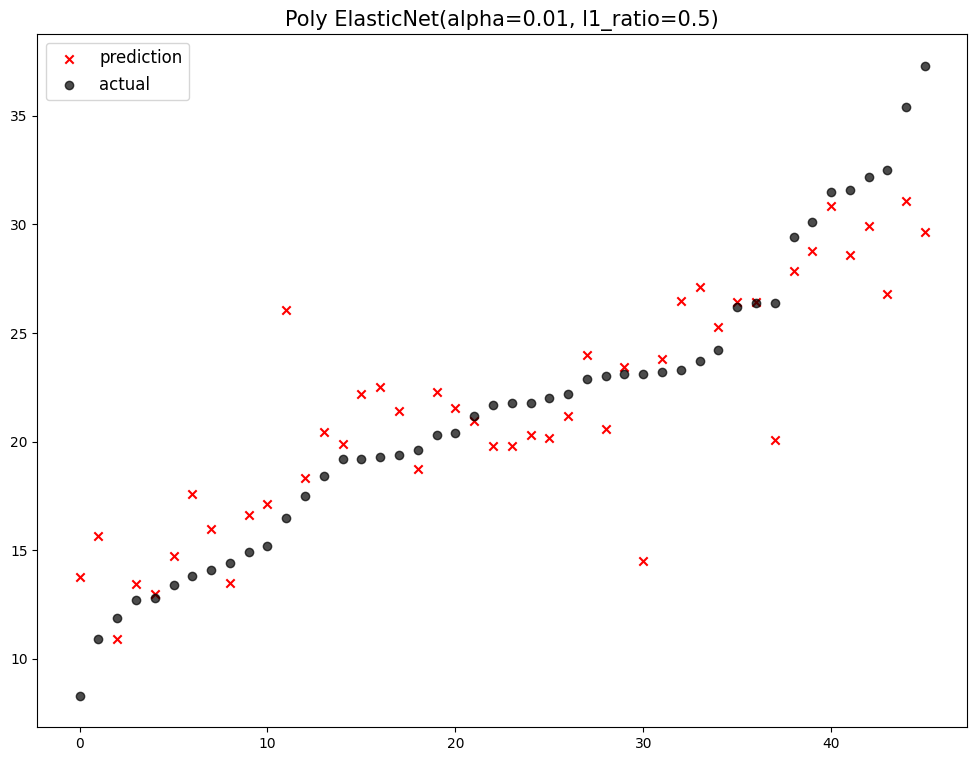


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
..                                       ...       ...
60   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
61    Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
62    Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
63    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
64  Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[65 rows x 2 columns]


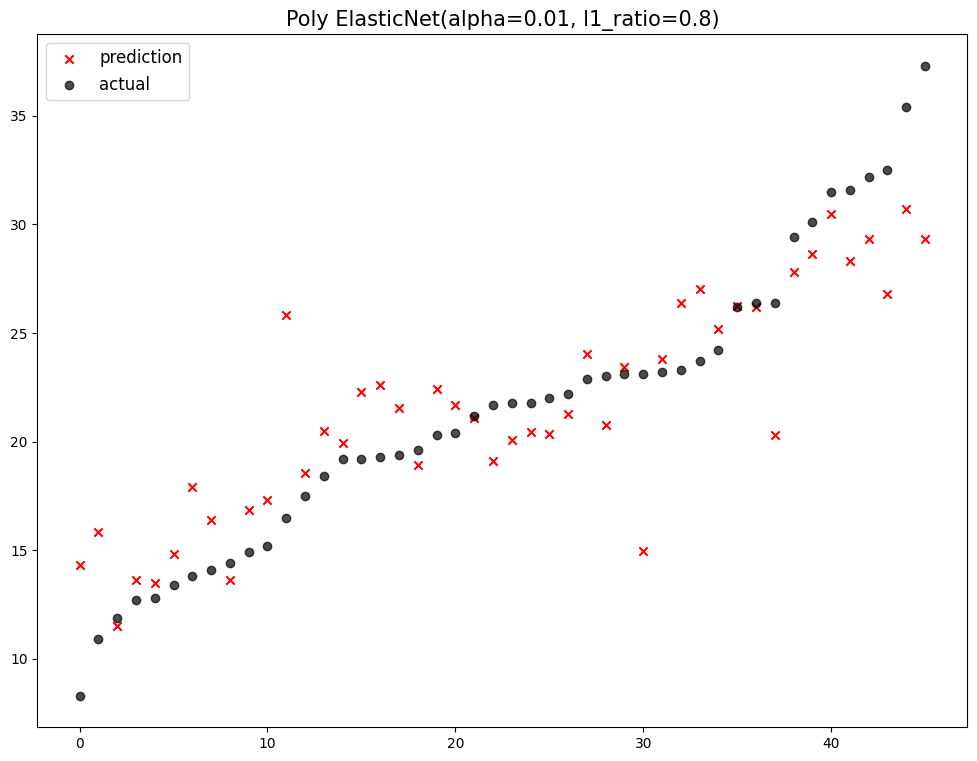


                                       model      rmse
0                      Poly Ridge(alpha = 1)  2.285858
1                  Poly Lasso(alpha = 0.001)  2.480847
2                   Poly Ridge(alpha = 0.01)  2.504467
3                    Poly Ridge(alpha = 0.1)  2.524740
4                  Poly Ridge(alpha = 0.001)  2.554142
..                                       ...       ...
61   Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
62    Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
63    Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
64    Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
65  Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[66 rows x 2 columns]


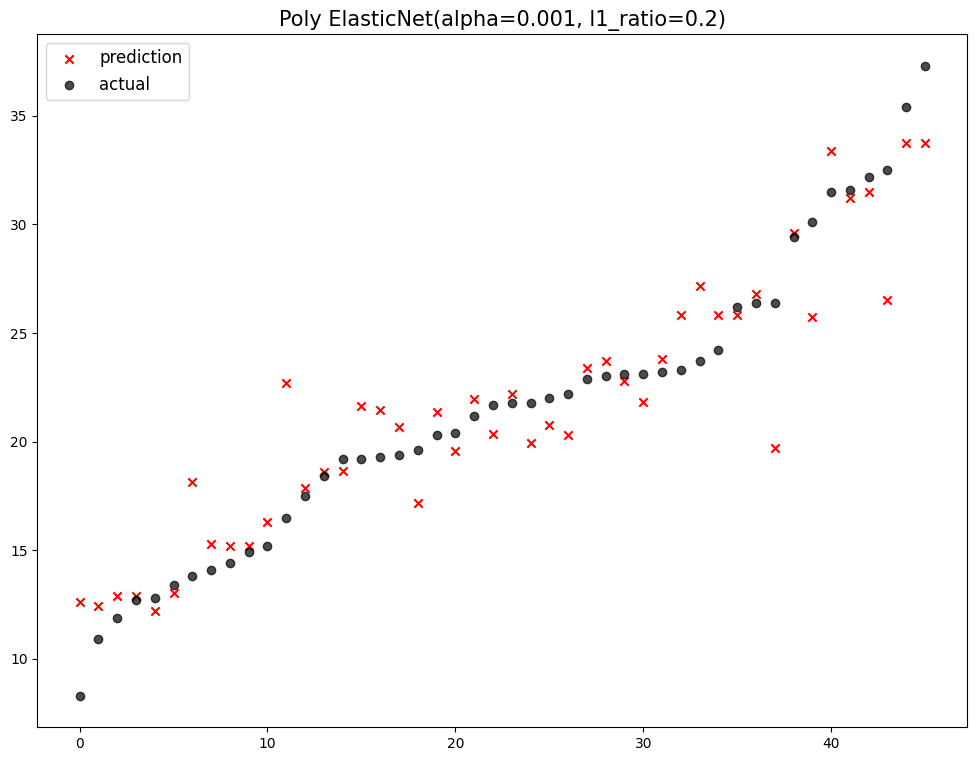


                                         model      rmse
0                        Poly Ridge(alpha = 1)  2.285858
1   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.368040
2                    Poly Lasso(alpha = 0.001)  2.480847
3                     Poly Ridge(alpha = 0.01)  2.504467
4                      Poly Ridge(alpha = 0.1)  2.524740
..                                         ...       ...
62     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
63      Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
64      Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
65      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
66    Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[67 rows x 2 columns]


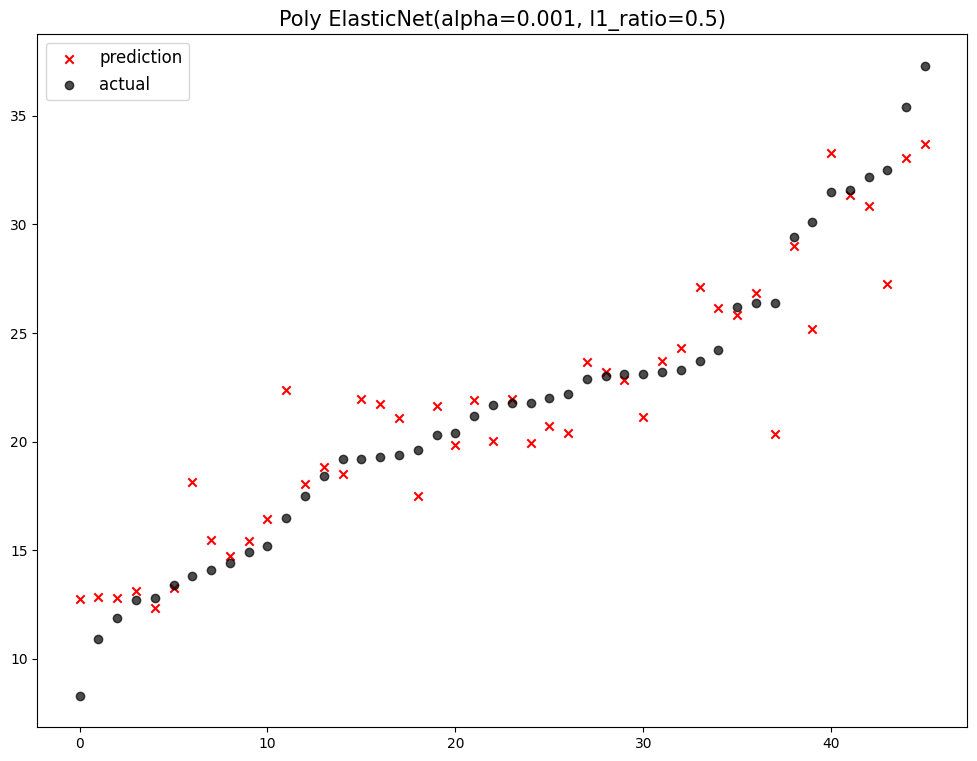


                                         model      rmse
0                        Poly Ridge(alpha = 1)  2.285858
1   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.336122
2   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.368040
3                    Poly Lasso(alpha = 0.001)  2.480847
4                     Poly Ridge(alpha = 0.01)  2.504467
..                                         ...       ...
63     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
64      Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
65      Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
66      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
67    Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[68 rows x 2 columns]


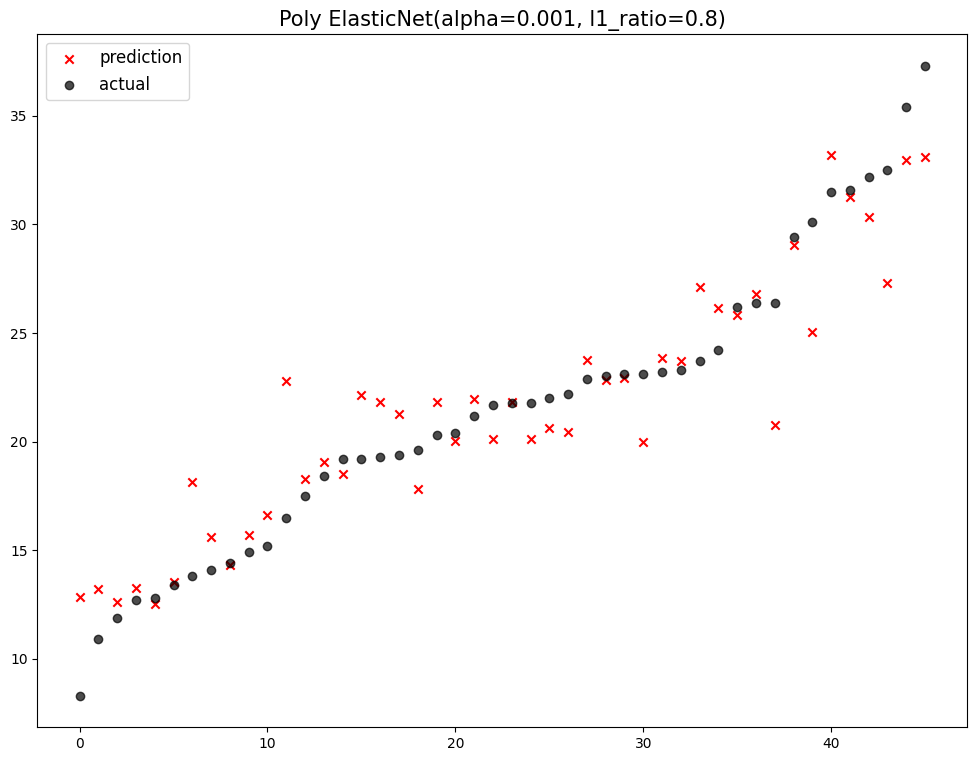


                                         model      rmse
0                        Poly Ridge(alpha = 1)  2.285858
1   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.336122
2   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.368040
3   Poly ElasticNet(alpha=0.001, l1_ratio=0.8)  2.412765
4                    Poly Lasso(alpha = 0.001)  2.480847
..                                         ...       ...
64     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
65      Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
66      Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
67      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
68    Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[69 rows x 2 columns]


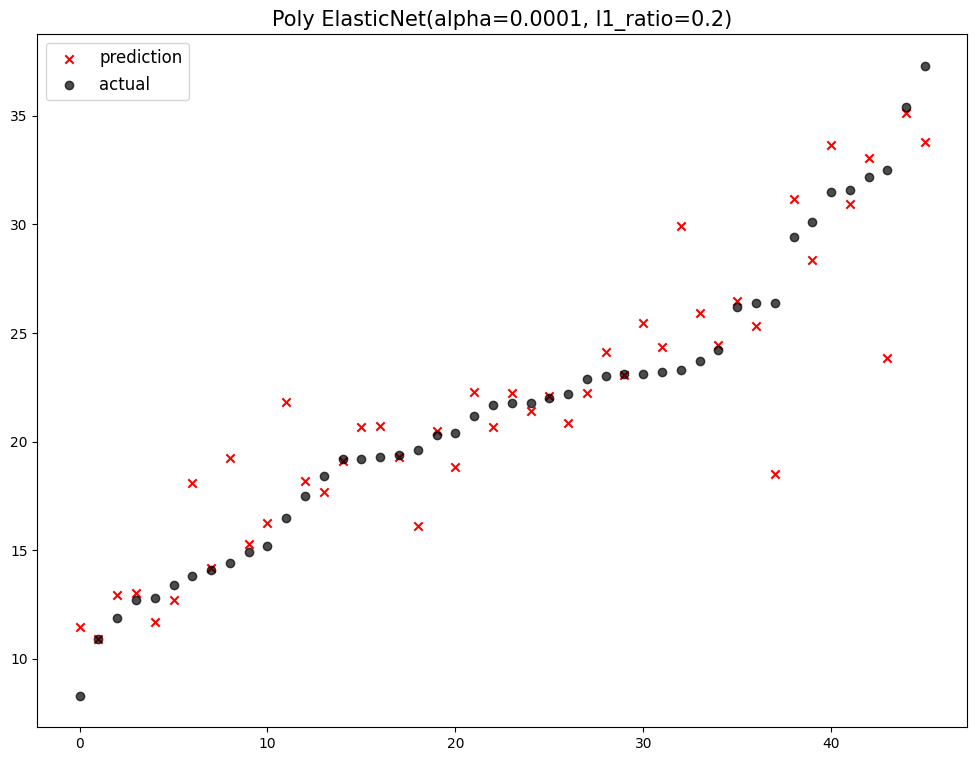


                                         model      rmse
0                        Poly Ridge(alpha = 1)  2.285858
1   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.336122
2   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.368040
3   Poly ElasticNet(alpha=0.001, l1_ratio=0.8)  2.412765
4                    Poly Lasso(alpha = 0.001)  2.480847
..                                         ...       ...
65     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
66      Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
67      Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
68      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
69    Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[70 rows x 2 columns]


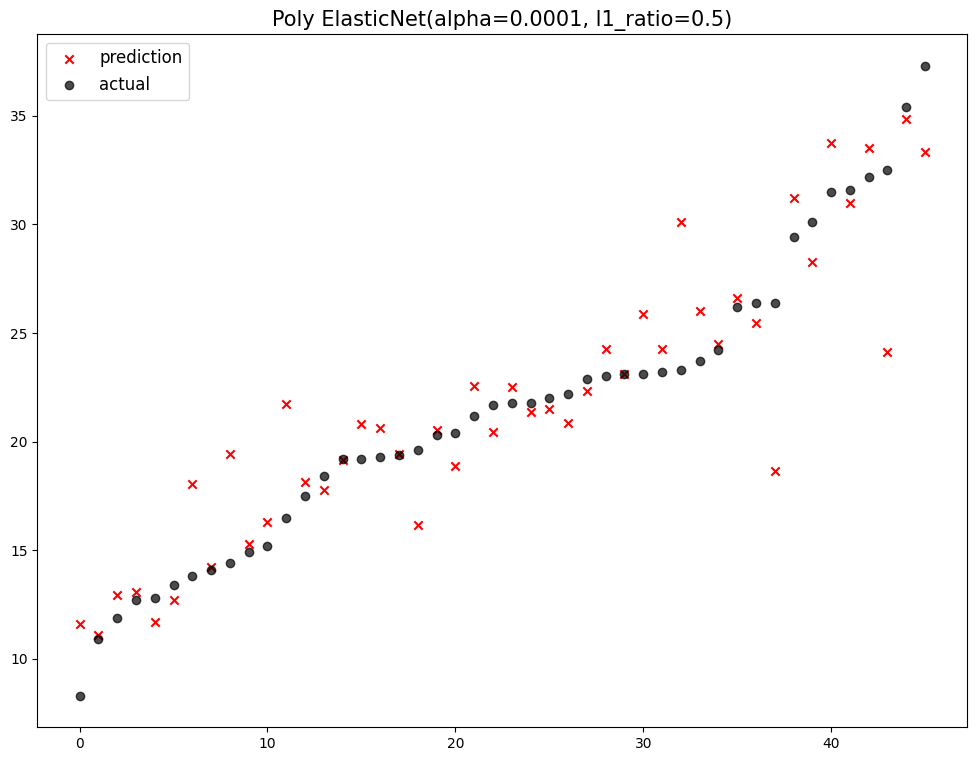


                                         model      rmse
0                        Poly Ridge(alpha = 1)  2.285858
1   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.336122
2   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.368040
3   Poly ElasticNet(alpha=0.001, l1_ratio=0.8)  2.412765
4                    Poly Lasso(alpha = 0.001)  2.480847
..                                         ...       ...
66     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
67      Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
68      Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
69      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
70    Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[71 rows x 2 columns]


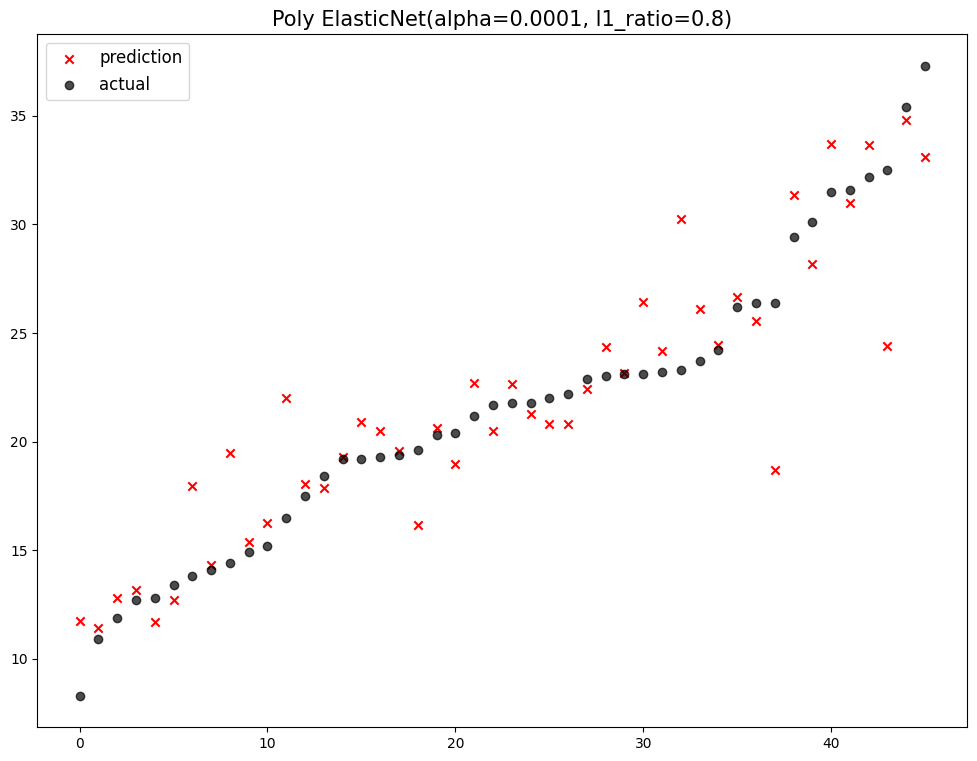


                                         model      rmse
0                        Poly Ridge(alpha = 1)  2.285858
1   Poly ElasticNet(alpha=0.001, l1_ratio=0.5)  2.336122
2   Poly ElasticNet(alpha=0.001, l1_ratio=0.2)  2.368040
3   Poly ElasticNet(alpha=0.001, l1_ratio=0.8)  2.412765
4                    Poly Lasso(alpha = 0.001)  2.480847
..                                         ...       ...
67     Poly ElasticNet(alpha=10, l1_ratio=0.8)  6.673060
68      Poly ElasticNet(alpha=1, l1_ratio=0.2)  6.673060
69      Poly ElasticNet(alpha=1, l1_ratio=0.5)  6.673060
70      Poly ElasticNet(alpha=1, l1_ratio=0.8)  6.673060
71    Poly ElasticNet(alpha=0.1, l1_ratio=0.8)  6.673060

[72 rows x 2 columns]


In [45]:
for alpha in alphas: # 규제 강도를 조정해 가면서..
    for ratio in ratios: # 규제 혼합 비율을 조정해 가면서..
        # 모델 객체 생성
        poly_elasticnet = make_pipeline(
            PolynomialFeatures(degree = 2,include_bias = False),
            ElasticNet(alpha = alpha, l1_ratio = ratio)
        )
        poly_elasticnet.fit(scaled_X_train, scaled_y_train) # 학습
        poly_elasticnet_pred = np.expm1(poly_elasticnet.predict(scaled_X_valid)) # 예측
        rmse_eval('Poly ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio), poly_elasticnet_pred, y_valid) # 평가

### **5-7. 최종 회귀 모형 선택**

- RMSE 값이 가장 작은 **PolyRidge(alpha = 1)** 모델이 가장 예측 성능이 좋은 회귀 모델이라 평가할 수 있다.

In [46]:
# 모델 객체 생성
poly_ridge1 = make_pipeline(
    PolynomialFeatures(degree = 2,include_bias = False),
    Ridge(alpha = 1)
)
poly_ridge1.fit(scaled_X_train, scaled_y_train) # 학습
poly_ridge1_pred = np.expm1(poly_ridge1.predict(scaled_X_valid)) # 예측

# **6. 제출 파일 생성**

In [47]:
### 정답 파일 예시 확인

submit = pd.read_csv('./datasets/sample_submission.csv')
submit.head(3) # 3개의 데이터만 확인

,ID,MEDV
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0


In [48]:
### 가장 성능이 좋았던 PolyLasso(alpha = 100) 모델로 예측

submit['MEDV'] = np.expm1(poly_ridge1.predict(scaled_test))
submit.head()

,ID,MEDV
0,TEST_000,22.117346
1,TEST_001,43.931440
2,TEST_002,16.117252
3,TEST_003,22.599258
4,TEST_004,23.692474


In [49]:
### 제출 파일 저장

submit.to_csv('./submit_minmax_target.csv', index=False)